# ***Análisis Exploratorio de Datos***

El presente trabajo se realiza con el objetivo de desarrollar un modelo híbrido para la predicción del desempeño en inglés en el examen **Saber Pro**, utilizando un enfoque basado en técnicas de aprendizaje automático. Para ello, se propone un modelo de ***stacking*** que combina múltiples algoritmos de clasificación, optimizando su desempeño a través de un metamodelo basado en ***Regresión Logística***.

El objetivo principal es evaluar el desempeño de diferentes modelos individuales y comparar su efectividad frente a la estrategia híbrida. Dentro de los modelos de ***benchmark*** utilizados en el estudio se encuentran:

- ***K-Nearest Neighbors (KNN)***
- ***Regresión Ridge y Lasso***
- ***Clasificador Bayesiano***
- ***Árboles de Decisión (DT)***
- ***Random Forest (RF)***
- ***XGBoost***
- ***Máquinas de Soporte Vectorial (SVM)***
- ***Perceptrón Multicapa (MLP)***

El análisis se realizará sobre una base de datos proveniente del examen **Saber Pro**, la cual contiene variables académicas, socioeconómicas y demográficas de los estudiantes, así como su nivel de inglés clasificado en categorías como ***A-, A1, A2, B1 o B+***. A través de este estudio, se espera demostrar que la combinación de múltiples modelos mediante ***stacking*** puede mejorar la capacidad predictiva y generalización en problemas educativos de clasificación multiclase.

El resto del trabajo se encuentra organizado de la siguiente manera:

- ***Información del Conjunto de Datos***
- ***Análisis Exploratorio de Datos***
- ***Fundamentación Matemática de los Modelos***
- ***Implementación de los Modelos***
- ***Benchmark***
- ***Conclusiones***
- ***Referencias***

## ***Información del Conjunto de datos***

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Enable better formatting in Jupyter Notebook
pd.set_option('display.width', 1000)  # Adjust output width
pd.set_option('display.colheader_justify', 'center')  # Align column headers

# Improve DataFrame styling (works in Jupyter)
def style_dataframe(df):
    return df.style.set_properties(**{
        'background-color': '#f4f4f4',
        'border-color': 'black',
        'color': 'black',
        'font-size': '12px',
    }).set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', '#40466e'), ('color', 'white')]
    }])

Los datos se obtuvieron del portal de ***[GOV](https://www.gov.co)***

In [2]:
df = pd.read_csv("../Datos_Saber_Pro.csv")

In [3]:
df.shape

(332228, 27)

### ***Variables***

#### **Información Socioeconómica y del Hogar**  
- **`FAMI_ESTRATOVIVIENDA`**: Estrato socioeconómico reportado por el estudiante.  
- **`FAMI_TIENEAUTOMOVIL`**: Indica si el hogar posee automóvil.  
- **`FAMI_TIENECOMPUTADOR`**: Indica si el hogar posee computador.  
- **`FAMI_TIENEINTERNET`**: Indica si el hogar tiene conexión a internet.  
- **`FAMI_TIENELAVADORA`**: Indica si el hogar cuenta con lavadora.  
- **`FAMI_EDUCACIONPADRE`**: Nivel educativo alcanzado por el padre del estudiante.  
- **`FAMI_EDUCACIONMADRE`**: Nivel educativo alcanzado por la madre del estudiante.  

#### **Información Académica del Estudiante**  
- **`ESTU_NUCLEO_PREGRADO`**: Núcleo básico de conocimiento al que pertenece el programa de pregrado.  
- **`ESTU_NIVEL_PRGM_ACADEMICO`**: Nivel del programa académico (técnico, tecnológico, universitario, etc.).  
- **`ESTU_PRGM_ACADEMICO`**: Nombre del programa académico que cursa el estudiante.  
- **`ESTU_METODO_PRGM`**: Metodología del programa (presencial, virtual, distancia, etc.).  
- **`ESTU_VALORMATRICULAUNIVERSIDAD`**: Valor aproximado de la matrícula del programa en pesos colombianos.  

#### **Información de la Institución de Educación Superior (IES)**  
- **`INST_CARACTER_ACADEMICO`**: Tipo de institución según su carácter (universidad, instituto técnico, etc.).  
- **`INST_ORIGEN`**: Naturaleza jurídica de la institución (pública o privada).  

#### **Características Demográficas del Estudiante**  
- **`ESTU_GENERO`**: Género del estudiante.  
- **`ESTU_NACIONALIDAD`**: Nacionalidad del estudiante.  
- **`ESTU_ESTUDIANTE`**: Indica si el estudiante pertenece a una IES (S) o se presentó como individual (N).  
- **`ESTU_HORASSEMANATRABAJA`**: Número de horas a la semana que trabaja el estudiante.  

#### **Información sobre el Financiamiento de la Matrícula**  
- **`ESTU_PAGOMATRICULABECA`**: Indica si el estudiante cubre la matrícula mediante beca.  
- **`ESTU_PAGOMATRICULACREDITO`**: Indica si el estudiante usa crédito educativo para pagar la matrícula.  
- **`ESTU_PAGOMATRICULAPADRES`**: Indica si los padres del estudiante financian la matrícula.  
- **`ESTU_PAGOMATRICULAPROPIO`**: Indica si el estudiante paga su matrícula con recursos propios.  

#### **Información Geográfica**  
- **`ESTU_DEPTO_RESIDE`**: Departamento de residencia del estudiante.  
- **`ESTU_MCPIO_RESIDE`**: Municipio de residencia del estudiante.  
- **`ESTU_DEPTO_PRESENTACION`**: Departamento donde presentó el examen Saber Pro.  
- **`ESTU_MCPIO_PRESENTACION`**: Municipio donde presentó el examen Saber Pro.  

#### **Variable Objetivo**  
- **`MOD_INGLES_DESEM`**: Nivel de desempeño en el módulo de inglés del Saber Pro, categorizado ordinalmente (*A-, A1, A2, B1, B+*).

## ***Análisis Exploratorio de Datos***

In [4]:
# libraries
import numpy as np
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib
import scipy.stats as stats

En esta sección, se presenta un ***Análisis Exploratorio de Datos (EDA)*** sobre el dataset empleado, con el objetivo de identificar el comportamiento de las variables, detectar valores faltantes, así como analizar patrones relevantes antes de proceder con la construcción de los modelos de clasificación.

### ***Estadísticas Descriptivas***

Podemos obtener una previsualización del dataset utilizando la método ***`.head()`***, que muestra las primeras filas del conjunto de datos. Esto permite inspeccionar su estructura, tipos de datos y valores iniciales antes de profundizar en el análisis exploratorio.

In [5]:
df.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_NUCLEO_PREGRADO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_VALORMATRICULAUNIVERSIDAD,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_GENERO,ESTU_NACIONALIDAD,ESTU_ESTUDIANTE,ESTU_HORASSEMANATRABAJA,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_DEPTO_PRESENTACION,ESTU_MCPIO_PRESENTACION,MOD_INGLES_DESEM
0,Estrato 2,No,Si,Si,Si,Técnica o tecnológica completa,Técnica o tecnológica completa,MEDICINA VETERINARIA,UNIVERSITARIO,MEDICINA VETERINARIA Y ZOOTECNIA,PRESENCIAL,Entre 500 mil y menos de 1 millón,UNIVERSIDAD,OFICIAL DEPARTAMENTAL,M,COLOMBIA,ESTUDIANTE,Menos de 10 horas,Si,No,Si,No,TOLIMA,IBAGUÉ,TOLIMA,IBAGUÉ,A2
1,Estrato 2,No,Si,Si,Si,Primaria incompleta,Técnica o tecnológica completa,ECONOMÍA,UNIVERSITARIO,NEGOCIOS INTERNACIONALES,PRESENCIAL,Entre 2.5 millones y menos de 4 millones,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - FUNDACIÓN,M,COLOMBIA,ESTUDIANTE,Entre 21 y 30 horas,Si,No,Si,No,ANTIOQUIA,ANDES,BOGOTÁ,BOGOTÁ D.C.,B1
2,Estrato 2,No,Si,Si,Si,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,ADMINISTRACIÓN,UNIVERSITARIO,ADMINISTRACIÓN INTEGRAL DE RIESGOS DE SEGURIDA...,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,M,COLOMBIA,ESTUDIANTE,Más de 30 horas,No,Si,No,No,ATLANTICO,SOLEDAD,ATLANTICO,BARRANQUILLA,A1
3,Estrato 3,No,Si,Si,No,Educación profesional completa,Educación profesional incompleta,DISEÑO,UNIVERSITARIO,DISEÑO GRAFICO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,INSTITUCIÓN UNIVERSITARIA,OFICIAL DEPARTAMENTAL,F,COLOMBIA,ESTUDIANTE,Más de 30 horas,No,Si,Si,No,BOLIVAR,CARTAGENA DE INDIAS,BOLIVAR,CARTAGENA DE INDIAS,A1
4,Estrato 2,No,Si,Si,Si,No sabe,Técnica o tecnológica completa,INGENIERÍA CIVIL Y AFINES,UNIVERSITARIO,INGENIERIA CIVIL,PRESENCIAL,Más de 7 millones,UNIVERSIDAD,NO OFICIAL - CORPORACIÓN,F,COLOMBIA,ESTUDIANTE,Entre 21 y 30 horas,Si,No,No,No,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,B1


Se evidencia solo datos categoricos en el dataset

In [6]:
df.shape

(332228, 27)

Se evidencia un dataset con $1.107.427$ registros, 26 variables predictoras y una variable objetivo.

In [7]:
df.describe()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_NUCLEO_PREGRADO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_VALORMATRICULAUNIVERSIDAD,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_GENERO,ESTU_NACIONALIDAD,ESTU_ESTUDIANTE,ESTU_HORASSEMANATRABAJA,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_DEPTO_PRESENTACION,ESTU_MCPIO_PRESENTACION,MOD_INGLES_DESEM
count,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228,332228
unique,7,2,2,2,2,12,12,56,1,974,3,8,4,6,2,52,1,5,2,2,2,2,34,1020,33,120,5
top,Estrato 2,No,Si,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,ADMINISTRACIÓN,UNIVERSITARIO,DERECHO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,UNIVERSIDAD,NO OFICIAL - CORPORACIÓN,F,COLOMBIA,ESTUDIANTE,Más de 30 horas,No,No,Si,No,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,A2
freq,117719,212915,301840,296040,285934,64582,71083,68990,332228,24564,260037,96430,200319,117024,195941,331651,332228,126127,261816,227052,166644,186509,90195,90195,201614,201614,126392


#### ***Condiciones Socioeconómicas y del Hogar***  
La variable `FAMI_ESTRATOVIVIENDA` exhibe una distribución en siete categorías, siendo ***"Estrato 2"*** el más prevalente, lo cual refleja una concentración significativa en niveles socioeconómicos medios-bajos. Las variables `FAMI_TIENEAUTOMOVIL`, `FAMI_TIENECOMPUTADOR`, `FAMI_TIENEINTERNET` y `FAMI_TIENELAVADORA` son dicotómicas, con una marcada predominancia de respuestas afirmativas. En particular, más del $89\%$ de los examinados manifiesta contar con computador e internet en su hogar, lo cual sugiere un acceso tecnológico generalizado entre la población evaluada.

#### ***Nivel Educativo de los Padres***  
Las variables `FAMI_EDUCACIONPADRE` y `FAMI_EDUCACIONMADRE` presentan doce categorías cada una. En ambas se destaca la categoría ***"Secundaria (Bachillerato) completa"*** como la más frecuente, lo que podría estar relacionado con ciertos patrones intergeneracionales en la trayectoria educativa.

#### ***Programa Académico y Nivel de Formación***  
La variable `ESTU_NUCLEO_PREGRADO` comprende 56 núcleos de conocimiento, con ***"ADMINISTRACIÓN"*** como el más representado. Por su parte, `ESTU_PRGM_ACADEMICO` muestra una alta cardinalidad con 1006 programas distintos, liderado por ***"DERECHO"***, lo cual puede reflejar una alta heterogeneidad en la oferta académica. La variable `ESTU_NIVEL_PRGM_ACADEMICO` presenta un único valor (***"UNIVERSITARIO"***), por lo que carece de variabilidad y podría ser descartada en etapas posteriores de modelado. La metodología de formación (`ESTU_METODO_PRGM`) se distribuye en tres modalidades, siendo ***"PRESENCIAL"*** la dominante.

#### ***Información Económica del Programa Académico***  
`ESTU_VALORMATRICULAUNIVERSIDAD` agrupa los valores de matrícula en ocho rangos. Se observa una mayor frecuencia en el intervalo ***"Entre 1 millón y menos de 2.5 millones"***, lo que permite inferir que gran parte del estudiantado se encuentra en instituciones con costos intermedios.

#### ***Características de la Institución de Educación Superior (IES)***  
`INST_CARACTER_ACADEMICO` presenta cuatro niveles, siendo ***"UNIVERSIDAD"*** el más representativo. En cuanto a `INST_ORIGEN`, se identifican seis categorías, con un peso importante de las instituciones ***"NO OFICIAL - CORPORACIÓN"***, lo cual denota una significativa participación del sector privado en la educación superior.

#### ***Información Demográfica del Estudiante***  
La variable `ESTU_GENERO` es binaria, predominando la categoría femenina. En cuanto a `ESTU_NACIONALIDAD`, se identifican 82 países, sin embargo, ***"COLOMBIA"*** representa la casi totalidad de los casos, por lo que las otras categorías tienen poca relevancia analítica. La variable `ESTU_ESTUDIANTE` también es monovariada, al presentar exclusivamente el valor ***"ESTUDIANTE"***, por lo cual no aporta valor informativo. Respecto al tiempo dedicado al trabajo (`ESTU_HORASSEMANATRABAJA`), se identifican cinco categorías, con ***"Más de 30 horas"*** como la más común, lo que sugiere una alta carga laboral en una parte sustancial de los estudiantes. La variable `ESTU_PRIVADO_LIBERTAD` tiene una frecuencia casi absoluta en la categoría ***"N"***, por lo cual podría descartarse del análisis por su falta de variabilidad.

#### ***Financiamiento de la Matrícula***  
Las variables `ESTU_PAGOMATRICULABECA`, `ESTU_PAGOMATRICULACREDITO`, `ESTU_PAGOMATRICULAPADRES` y `ESTU_PAGOMATRICULAPROPIO` son de tipo binario. Los resultados indican que casi la mitad del estudiantado cuenta con apoyo financiero por parte de sus padres (***más de 500 mil casos***). El uso de becas es menos frecuente, lo que podría indicar limitaciones en el acceso a estos mecanismos.

#### ***Información Geográfica***  
Las variables geográficas relacionadas con residencia y presentación del examen (`ESTU_DEPTO_RESIDE`, `ESTU_MCPIO_RESIDE`, `ESTU_DEPTO_PRESENTACION`, `ESTU_MCPIO_PRESENTACION`) presentan alta cardinalidad, con hasta ***1028 municipios diferentes***. ***Bogotá D.C.*** aparece consistentemente como el lugar más frecuente tanto de residencia como de presentación del examen, lo cual es coherente con su densidad poblacional y concentración institucional.

#### ***Variable Objetivo: Desempeño en Inglés***  
La variable `MOD_INGLES_DESEM` contiene cinco niveles ordinales: *A-*, *A1*, *A2*, *B1* y *B+*. Se identifica una fuerte concentración en el nivel ***A2***, con más de ***420 mil casos***, lo cual refleja una tendencia general hacia un desempeño intermedio-bajo en el módulo de inglés. Esta distribución indica un ***desbalance de clases significativo***, que debe ser abordado explícitamente en el diseño de los modelos de clasificación (por ejemplo, mediante reponderación o técnicas de sobremuestreo).

In [8]:
df.info()
display(df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332228 entries, 0 to 332227
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   FAMI_ESTRATOVIVIENDA            332228 non-null  object
 1   FAMI_TIENEAUTOMOVIL             332228 non-null  object
 2   FAMI_TIENECOMPUTADOR            332228 non-null  object
 3   FAMI_TIENEINTERNET              332228 non-null  object
 4   FAMI_TIENELAVADORA              332228 non-null  object
 5   FAMI_EDUCACIONPADRE             332228 non-null  object
 6   FAMI_EDUCACIONMADRE             332228 non-null  object
 7   ESTU_NUCLEO_PREGRADO            332228 non-null  object
 8   ESTU_NIVEL_PRGM_ACADEMICO       332228 non-null  object
 9   ESTU_PRGM_ACADEMICO             332228 non-null  object
 10  ESTU_METODO_PRGM                332228 non-null  object
 11  ESTU_VALORMATRICULAUNIVERSIDAD  332228 non-null  object
 12  INST_CARACTER_ACADEMICO       

FAMI_ESTRATOVIVIENDA                 7
FAMI_TIENEAUTOMOVIL                  2
FAMI_TIENECOMPUTADOR                 2
FAMI_TIENEINTERNET                   2
FAMI_TIENELAVADORA                   2
FAMI_EDUCACIONPADRE                 12
FAMI_EDUCACIONMADRE                 12
ESTU_NUCLEO_PREGRADO                56
ESTU_NIVEL_PRGM_ACADEMICO            1
ESTU_PRGM_ACADEMICO                974
ESTU_METODO_PRGM                     3
ESTU_VALORMATRICULAUNIVERSIDAD       8
INST_CARACTER_ACADEMICO              4
INST_ORIGEN                          6
ESTU_GENERO                          2
ESTU_NACIONALIDAD                   52
ESTU_ESTUDIANTE                      1
ESTU_HORASSEMANATRABAJA              5
ESTU_PAGOMATRICULABECA               2
ESTU_PAGOMATRICULACREDITO            2
ESTU_PAGOMATRICULAPADRES             2
ESTU_PAGOMATRICULAPROPIO             2
ESTU_DEPTO_RESIDE                   34
ESTU_MCPIO_RESIDE                 1020
ESTU_DEPTO_PRESENTACION             33
ESTU_MCPIO_PRESENTACION  

***Estructura General del Dataset***

Los métodos `.info()` y `.nunique()` permite obtener una visión general del conjunto de datos, incluyendo el número total de registros, columnas, niveles, tipo de datos y presencia de valores nulos. En este caso, el dataset cuenta con un total de ****332.228 observaciones**** y ****28 variables****, todas de tipo `object`, lo cual indica que se trata exclusivamente de variables categóricas o texto.

- ****No se presentan valores nulos**** en ninguna de las columnas, lo cual facilita las tareas de procesamiento y modelado posteriores.
- El hecho de que todas las variables sean categóricas exige una fase de transformación adecuada para la aplicación de algoritmos de aprendizaje automático, que requieren representaciones numéricas.
  
***Aspectos relevantes para el Preprocesamiento***

* ***Variables con un único nivel***  
   Algunas variables presentan un solo valor posible en todos los registros, como ****`ESTU_NIVEL_PRGM_ACADEMICO`**** (únicamente "UNIVERSITARIO") o ****`ESTU_ESTUDIANTE`**** (únicamente "ESTUDIANTE"). Dado que estas columnas no aportan información discriminativa, se recomienda descartarlas del análisis y del modelado.

* ***Variables con alta cardinalidad***  
   Se identifican variables como ****`ESTU_PRGM_ACADEMICO`**** (974 niveles), ****`ESTU_MCPIO_RESIDE`**** y ****`ESTU_MCPIO_PRESENTACION`**** (más de 1.000 municipios únicos), que presentan un número excesivo de categorías. Este tipo de variables puede ser problemático por varias razones:
   - Aumentan la dimensionalidad si se codifican mediante one-hot encoding.
   - Pueden introducir ruido o variabilidad no explicativa si no se agrupan adecuadamente.
   
   Para estas variables, se recomienda: Aplicar técnicas de ****agrupamiento por frecuencia**** (por ejemplo, conservar solo las categorías más comunes y agrupar el resto en "OTROS")

* ***Conversión de variables***  
   Algunas variables actualmente representadas como texto podrían beneficiarse de una codificación ordinal explícita, especialmente si existe una relación jerárquica entre categorías (por ejemplo, niveles educativos, estratos socioeconómicos o niveles de inglés). La correcta transformación puede potenciar el rendimiento de modelos supervisados.

In [9]:
df.isnull().sum()

FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEAUTOMOVIL               0
FAMI_TIENECOMPUTADOR              0
FAMI_TIENEINTERNET                0
FAMI_TIENELAVADORA                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_NUCLEO_PREGRADO              0
ESTU_NIVEL_PRGM_ACADEMICO         0
ESTU_PRGM_ACADEMICO               0
ESTU_METODO_PRGM                  0
ESTU_VALORMATRICULAUNIVERSIDAD    0
INST_CARACTER_ACADEMICO           0
INST_ORIGEN                       0
ESTU_GENERO                       0
ESTU_NACIONALIDAD                 0
ESTU_ESTUDIANTE                   0
ESTU_HORASSEMANATRABAJA           0
ESTU_PAGOMATRICULABECA            0
ESTU_PAGOMATRICULACREDITO         0
ESTU_PAGOMATRICULAPADRES          0
ESTU_PAGOMATRICULAPROPIO          0
ESTU_DEPTO_RESIDE                 0
ESTU_MCPIO_RESIDE                 0
ESTU_DEPTO_PRESENTACION           0
ESTU_MCPIO_PRESENTACION           0
MOD_INGLES_DESEM                  0
dtype: int64

La revisión de valores nulos confirma que **no hay datos faltantes en el dataset**, lo que evita la necesidad de imputación y permite un uso directo en modelos de machine learning.

In [10]:
# Detect columns with only one unique value
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Manually append additional columns to drop
cols_to_drop.extend(['ESTU_MCPIO_RESIDE', 'ESTU_MCPIO_PRESENTACION', 'ESTU_PRGM_ACADEMICO'])

# Drop the columns from the DataFrame
df_reduced = df.drop(columns=cols_to_drop)

# Print message with proper pluralization
if len(cols_to_drop) == 1:
    print(f"Removed 1 column: {cols_to_drop[0]}")
else:
    print(f"Removed {len(cols_to_drop)} columns: {cols_to_drop}")


Removed 5 columns: ['ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_ESTUDIANTE', 'ESTU_MCPIO_RESIDE', 'ESTU_MCPIO_PRESENTACION', 'ESTU_PRGM_ACADEMICO']


In [11]:
df_reduced.shape

(332228, 22)

In [12]:
# Function to reduce cardinality by grouping infrequent categories as 'OTROS'
def reduce_cardinality(column, threshold=0.01):
    # Calculate relative frequency for each category
    freq = column.value_counts(normalize=True)
    
    # Identify frequent categories
    frequent_categories = freq[freq >= threshold].index
    
    # Replace infrequent categories with 'OTROS'
    reduced_column = column.apply(lambda x: x if x in frequent_categories else 'OTROS')
    
    # Print summary
    original_unique = column.nunique()
    reduced_unique = reduced_column.nunique()
    print(f"{column.name}: {original_unique} → {reduced_unique} categories (after reduction)")
    print(f"Top categories retained: {list(frequent_categories)}\n")
    
    return reduced_column

# Apply reduction to high-cardinality columns
df_reduced['ESTU_DEPTO_RESIDE'] = reduce_cardinality(df_reduced['ESTU_DEPTO_RESIDE'])
df_reduced['ESTU_DEPTO_PRESENTACION'] = reduce_cardinality(df_reduced['ESTU_DEPTO_PRESENTACION'])


ESTU_DEPTO_RESIDE: 34 → 23 categories (after reduction)
Top categories retained: ['BOGOTÁ', 'ANTIOQUIA', 'VALLE', 'CUNDINAMARCA', 'ATLANTICO', 'SANTANDER', 'BOLIVAR', 'NORTE SANTANDER', 'BOYACA', 'TOLIMA', 'NARIÑO', 'CORDOBA', 'HUILA', 'RISARALDA', 'META', 'CALDAS', 'CAUCA', 'CESAR', 'MAGDALENA', 'SUCRE', 'QUINDIO', 'LA GUAJIRA']

ESTU_DEPTO_PRESENTACION: 33 → 19 categories (after reduction)
Top categories retained: ['BOGOTÁ', 'ANTIOQUIA', 'VALLE', 'ATLANTICO', 'CUNDINAMARCA', 'SANTANDER', 'NORTE SANTANDER', 'BOLIVAR', 'CORDOBA', 'TOLIMA', 'BOYACA', 'NARIÑO', 'HUILA', 'CAUCA', 'RISARALDA', 'CALDAS', 'META', 'CESAR']



In [13]:
# Regional mapping based on DANE's natural regions
region_mapping = {
    'ANDINA': [
        'ANTIOQUIA', 'BOYACA', 'CALDAS', 'CUNDINAMARCA', 'HUILA', 'QUINDIO',
        'RISARALDA', 'SANTANDER', 'NORTE SANTANDER', 'TOLIMA'
    ],
    'CARIBE': [
        'ATLANTICO', 'BOLIVAR', 'CESAR', 'CORDOBA', 'LA GUAJIRA', 'MAGDALENA', 'SUCRE'
    ],
    'PACIFICA': [
        'VALLE', 'CAUCA', 'NARIÑO'
    ],
    'ORINOQUIA': [
        'META'
    ],
    'BOGOTA': [
        'BOGOTÁ'
    ],
    'OTROS': []  # Otros departamentos o valores residuales
}

def map_region(depto):
    for region, deptos in region_mapping.items():
        if depto in deptos:
            return region
    return 'OTROS'

df_reduced['ESTU_DEPTO_RESIDE'] = df_reduced['ESTU_DEPTO_RESIDE'].apply(map_region)
df_reduced['ESTU_DEPTO_PRESENTACION'] = df_reduced['ESTU_DEPTO_PRESENTACION'].apply(map_region)


In [14]:
latam = ['ECUADOR', 'VENEZUELA', 'EL SALVADOR', 'PANAMÁ', 'ARGENTINA',
         'PERÚ', 'CUBA', 'REPÚBLICA DOMINICANA', 'PARAGUAY',
         'BRASIL', 'NICARAGUA', 'HONDURAS', 'HAITI']

europa = ['FRANCIA', 'ITALIA', 'ESPAÑA', 'ALEMANIA', 'PAÍSES BAJOS - HOLANDA', 'UCRANIA']

otros = ['ESTADOS UNIDOS', 'GABÓN', 'ESTADOS FEDERADOS DE MICRONESIA']

def agrupar_nacionalidad(x):
    if x == 'COLOMBIA':
        return 'COLOMBIA'
    elif x in latam:
        return 'LATINOAMERICA'
    elif x in europa:
        return 'EUROPA'
    else:
        return 'OTROS'

df_reduced['ESTU_NACIONALIDAD'] = df_reduced['ESTU_NACIONALIDAD'].apply(agrupar_nacionalidad)


In [15]:
# Dictionary mapping detailed categories to grouped categories
NUCLEO_PREGRADO_MAP = {
    'INGENIERÍA AGRÍCOLA, FORESTAL Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA CIVIL Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA AMBIENTAL, SANITARIA Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA INDUSTRIAL Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA ADMINISTRATIVA Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA ELÉCTRICA Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA MECÁNICA Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA QUÍMICA Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA AGRONÓMICA, PECUARIA Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA AGROINDUSTRIAL, ALIMENTOS Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA BIOMÉDICA Y AFINES': 'INGENIERÍAS',
    'INGENIERÍA DE MINAS, METALURGIA Y AFINES': 'INGENIERÍAS',
    'OTRAS INGENIERÍAS': 'INGENIERÍAS',

    'MEDICINA': 'SALUD',
    'ENFERMERÍA': 'SALUD',
    'ODONTOLOGÍA': 'SALUD',
    'NUTRICIÓN Y DIETÉTICA': 'SALUD',
    'BACTERIOLOGÍA': 'SALUD',
    'OPTOMETRÍA, OTROS PROGRAMAS DE CIENCIAS DE LA SALUD': 'SALUD',
    'TERAPIAS': 'SALUD',
    'INSTRUMENTACIÓN QUIRÚRGICA': 'SALUD',
    'SALUD PUBLICA': 'SALUD',

    'DERECHO Y AFINES': 'CIENCIAS_SOCIALES',
    'PSICOLOGÍA': 'CIENCIAS_SOCIALES',
    'SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES': 'CIENCIAS_SOCIALES',
    'CIENCIA POLÍTICA, RELACIONES INTERNACIONALES': 'CIENCIAS_SOCIALES',
    'FILOSOFÍA, TEOLOGÍA Y AFINES': 'CIENCIAS_SOCIALES',
    'ANTROPOLOGÍA, ARTES LIBERALES': 'CIENCIAS_SOCIALES',
    'BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y HUMANAS': 'CIENCIAS_SOCIALES',
    'GEOGRAFÍA, HISTORIA': 'CIENCIAS_SOCIALES',

    'BIOLOGÍA, MICROBIOLOGÍA Y AFINES': 'CIENCIAS_NATURALES',
    'QUÍMICA Y AFINES': 'CIENCIAS_NATURALES',
    'FÍSICA': 'CIENCIAS_NATURALES',
    'MATEMÁTICAS, ESTADÍSTICA Y AFINES': 'CIENCIAS_NATURALES',
    'GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES': 'CIENCIAS_NATURALES',

    'ADMINISTRACIÓN': 'ECON_ADMIN',
    'CONTADURÍA PUBLICA': 'ECON_ADMIN',
    'ECONOMÍA': 'ECON_ADMIN',

    'EDUCACIÓN': 'EDUCACIÓN',
    'DEPORTES, EDUCACIÓN FÍSICA Y RECREACIÓN': 'EDUCACIÓN',

    'ARQUITECTURA': 'ARQUITECTURA_DISENO',
    'DISEÑO': 'ARQUITECTURA_DISENO',

    'ARTES PLÁSTICAS, VISUALES Y AFINES': 'ARTES',
    'MÚSICA': 'ARTES',
    'OTROS PROGRAMAS ASOCIADOS A BELLAS ARTES': 'ARTES',
    'ARTES REPRESENTATIVAS': 'ARTES',

    'COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES': 'COMUNICACIÓN',
    'PUBLICIDAD Y AFINES': 'COMUNICACIÓN',
    'LENGUAS MODERNAS, LITERATURA, LINGÜÍSTICA Y AFINES': 'COMUNICACIÓN',

    'FORMACIÓN RELACIONADA CON EL CAMPO MILITAR O POLICIAL': 'MILITAR_POLICIAL',
    'AGRONOMÍA': 'AGROPECUARIAS',
    'ZOOTECNIA': 'AGROPECUARIAS',
    'MEDICINA VETERINARIA': 'AGROPECUARIAS',
    
    'SIN CLASIFICAR': 'OTROS'
}
def map_nucleo_pregrado(nucleo):
    return NUCLEO_PREGRADO_MAP.get(nucleo, 'OTROS')

df_reduced['ESTU_NUCLEO_PREGRADO'] = df_reduced['ESTU_NUCLEO_PREGRADO'].apply(map_nucleo_pregrado)


In [16]:
df_reduced.nunique()

FAMI_ESTRATOVIVIENDA               7
FAMI_TIENEAUTOMOVIL                2
FAMI_TIENECOMPUTADOR               2
FAMI_TIENEINTERNET                 2
FAMI_TIENELAVADORA                 2
FAMI_EDUCACIONPADRE               12
FAMI_EDUCACIONMADRE               12
ESTU_NUCLEO_PREGRADO              12
ESTU_METODO_PRGM                   3
ESTU_VALORMATRICULAUNIVERSIDAD     8
INST_CARACTER_ACADEMICO            4
INST_ORIGEN                        6
ESTU_GENERO                        2
ESTU_NACIONALIDAD                  4
ESTU_HORASSEMANATRABAJA            5
ESTU_PAGOMATRICULABECA             2
ESTU_PAGOMATRICULACREDITO          2
ESTU_PAGOMATRICULAPADRES           2
ESTU_PAGOMATRICULAPROPIO           2
ESTU_DEPTO_RESIDE                  6
ESTU_DEPTO_PRESENTACION            6
MOD_INGLES_DESEM                   5
dtype: int64

## ***Análisis Gráfico***

### ***Variable Objetivo***

In [17]:
display(df_reduced['MOD_INGLES_DESEM'].value_counts())
display(df_reduced['MOD_INGLES_DESEM'].value_counts(normalize=True))

MOD_INGLES_DESEM
A2     126392
B1      72280
A1      69693
B2      33165
-A1     30698
Name: count, dtype: int64

MOD_INGLES_DESEM
A2    0.38
B1    0.22
A1    0.21
B2    0.10
-A1   0.09
Name: proportion, dtype: float64

***Distribución de la Variable Objetivo: `MOD_INGLES_DESEM`***

La variable objetivo ***`MOD_INGLES_DESEM`*** representa el nivel de desempeño de los estudiantes en el módulo de inglés del examen Saber Pro. Esta variable es de tipo ordinal y presenta cinco niveles:

- ***A2***: 38%  
- ***B1***: 22%  
- ***A1***: 21%  
- ***B2***: 10%  
- ***-A1***: 9%

Se observa que la clase ***A2*** concentra la mayor proporción de observaciones (**38% del total**), seguida de ***B1*** y ***A1***, con proporciones relativamente similares. Las clases extremas (*alto desempeño: B2*, *bajo desempeño: -A1*) tienen una representación más reducida, por debajo del 10% cada una.

Este patrón refleja un **desbalance moderado**, característico de problemas de clasificación multiclase con estructura ordinal. Aunque la distribución no es extremadamente sesgada, podría impactar en el rendimiento de ciertos modelos sensibles a la proporción de clases, como regresión logística multinomial, máquinas de soporte vectorial o redes neuronales sin regularización.

In [18]:
# Compute proportions
target_counts = df_reduced['MOD_INGLES_DESEM'].value_counts(normalize=True).sort_index()
target_labels = target_counts.index.tolist()
target_percentages = (target_counts.values * 100).round(2)

# Create percentage bar chart
fig_pct = px.bar(
    x=target_labels,
    y=target_percentages,
    text=[f"{p}%" for p in target_percentages],
    color=target_labels,
    color_discrete_sequence=px.colors.qualitative.Plotly,
    title="Proportional Distribution of English Proficiency Levels"
)

# Update layout
fig_pct.update_traces(texttemplate='%{text}', textposition='outside')
fig_pct.update_layout(
    xaxis_title="English Proficiency Level",
    yaxis_title="Percentage (%)",
    showlegend=False,
    yaxis=dict(range=[0, max(target_percentages) + 5])
)

fig_pct.show()


Gráficamente, también se puede observar el desbalance entre las clases.

Finalmente, para validar si realmente las diferencias en el número de observaciones son estadísticamente significativas, Se puede realizar una prueba de chi-cuadrado bajo la siguientes hipótesis:  

$$
H_0: p_1 = p_2 \\
H_1: p_1 \neq p_2
$$

**Estadístico Chi-cuadrado:**

$$
\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
$$

Donde:  
- $O_i$ = frecuencia observada  
- $E_i$ = frecuencia esperada  
- $k$ = número de categorías

Si tras aplicar la prueba de chi-cuadrado obtenemos un $\text{p-valor < 0.05}$, rechazamos la hipótesis nula, concluyendo que la diferencia en el número de observaciones entre las clases es estadísticamente significativa y, por tanto, se justifica aplicar técnicas de balanceo.  

Si el $\text{p-valor ≥ 0.05}$, no se rechaza la hipótesis nula, lo que indica que las diferencias observadas podrían ser atribuibles al azar y no sería necesario forzar un balanceo, aunque se debe evaluar su impacto en el rendimiento predictivo.

In [19]:
from scipy import stats

# Observed frequencies
observed = df['MOD_INGLES_DESEM'].value_counts().sort_index()

# Expected frequencies under H0 (uniform distribution)
expected = [len(df['MOD_INGLES_DESEM']) / len(observed)] * len(observed)

# Chi-square test
chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

display(f"Chi2 Statistic: {chi2_stat:.4f}")
display(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    display("Reject the null hypothesis: The class proportions are significantly different.")
else:
    display("Fail to reject the null hypothesis: The class proportions are not significantly different.")


'Chi2 Statistic: 90655.3022'

'P-value: 0.0000'

'Reject the null hypothesis: The class proportions are significantly different.'

Dado que el $\text{p-valor}$ es menor que $\alpha = 0.05$, se puede rechazar la hipótesis nula a favor de la significancia. Por tanto, será necesario aplicar alguna técnica de balanceo para impedir un favorecimiento injusto de las clases mayoritarias y evitar sesgo en el aprendizaje del modelo.

In [20]:
from scipy.stats import chi2_contingency

def chi2_test(col):
    contingency = pd.crosstab(df_reduced['MOD_INGLES_DESEM'], df_reduced[col])
    _, p, _, _ = chi2_contingency(contingency)
    return p

# Apply to all categorical columns except the target
pvals = {
    col: chi2_test(col) for col in df_reduced.columns 
    if col != 'MOD_INGLES_DESEM' and df_reduced[col].dtype == 'object'
}

# Sort by p-value (ascending)
sorted_pvals = sorted(pvals.items(), key=lambda x: x[1])

# Show top variables with strongest association (lowest p-values)
print("Correlation with English level (Chi-squared test):")
for var, p in sorted_pvals:
    print(f"{var}: p-value = {p:.4e}")


Correlation with English level (Chi-squared test):
FAMI_ESTRATOVIVIENDA: p-value = 0.0000e+00
FAMI_TIENEAUTOMOVIL: p-value = 0.0000e+00
FAMI_TIENECOMPUTADOR: p-value = 0.0000e+00
FAMI_TIENEINTERNET: p-value = 0.0000e+00
FAMI_TIENELAVADORA: p-value = 0.0000e+00
FAMI_EDUCACIONPADRE: p-value = 0.0000e+00
FAMI_EDUCACIONMADRE: p-value = 0.0000e+00
ESTU_NUCLEO_PREGRADO: p-value = 0.0000e+00
ESTU_METODO_PRGM: p-value = 0.0000e+00
ESTU_VALORMATRICULAUNIVERSIDAD: p-value = 0.0000e+00
INST_CARACTER_ACADEMICO: p-value = 0.0000e+00
INST_ORIGEN: p-value = 0.0000e+00
ESTU_GENERO: p-value = 0.0000e+00
ESTU_HORASSEMANATRABAJA: p-value = 0.0000e+00
ESTU_PAGOMATRICULACREDITO: p-value = 0.0000e+00
ESTU_PAGOMATRICULAPADRES: p-value = 0.0000e+00
ESTU_PAGOMATRICULAPROPIO: p-value = 0.0000e+00
ESTU_DEPTO_RESIDE: p-value = 0.0000e+00
ESTU_DEPTO_PRESENTACION: p-value = 0.0000e+00
ESTU_PAGOMATRICULABECA: p-value = 4.4930e-281
ESTU_NACIONALIDAD: p-value = 2.5445e-150


Al evaluar la asociación estadística entre la variable objetivo ***`MOD_INGLES_DESEM`*** y las variables categóricas mediante la ***prueba de independencia Chi-cuadrado***. Los resultados muestran que ***la mayoría de las variables presentan una dependencia estadísticamente significativa*** con el nivel de inglés (p-valor < 0.05), lo que sugiere que no son independientes y pueden aportar valor predictivo al modelo.

Variables como ***`FAMI_ESTRATOVIVIENDA`***, ***`FAMI_TIENECOMPUTADOR`***, ***`FAMI_TIENEINTERNET`*** y ***`FAMI_TIENEAUTOMOVIL`*** obtuvieron los p-valores mas bajos, indicando una fuerte asociación con el desempeño en inglés. Estas variables están relacionadas con el entorno socioeconómico y las condiciones del hogar, las cuales tienen un impacto reconocido en el aprendizaje de lenguas extranjeras.

También se observaron asociaciones significativas en variables académicas como ***`ESTU_NUCLEO_PREGRADO`***, ***`ESTU_METODO_PRGM`*** y ***`ESTU_VALORMATRICULAUNIVERSIDAD`***, lo cual sugiere que tanto el área de formación como el tipo de programa están correlacionados con el dominio del idioma.

### ***Análisis bivariado***

In [21]:
def plot_categorical_features(df, features, target_col="MOD_INGLES_DESEM"):
    for feature in features:
        # Create normalized crosstab (%)
        crosstab = pd.crosstab(df[feature], df[target_col], normalize='index') * 100

        # Create plot
        fig, ax = plt.subplots(figsize=(10, 5))
        bars = crosstab.plot(kind='bar', stacked=True, colormap='tab10', ax=ax)

        # Add percentage labels inside bars
        for container in bars.containers:
            for rect in container:
                height = rect.get_height()
                if height > 5:  # Only label if > 5% for visibility
                    ax.text(
                        rect.get_x() + rect.get_width() / 2,
                        rect.get_y() + height / 2,
                        f'{height:.1f}%',
                        ha='center',
                        va='center',
                        fontsize=8,
                        color='white'
                    )

        ax.set_title(f"Distribution of {feature} by English Level")
        ax.set_xlabel(feature)
        ax.set_ylabel("Percentage (%)")
        ax.legend(title="English Level", bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        yield fig
    
features = [
    col for col in df_reduced.columns
    if df_reduced[col].nunique() <= 10 and col != 'MOD_INGLES_DESEM'
]

cat_gen = plot_categorical_features(df_reduced, features)


/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



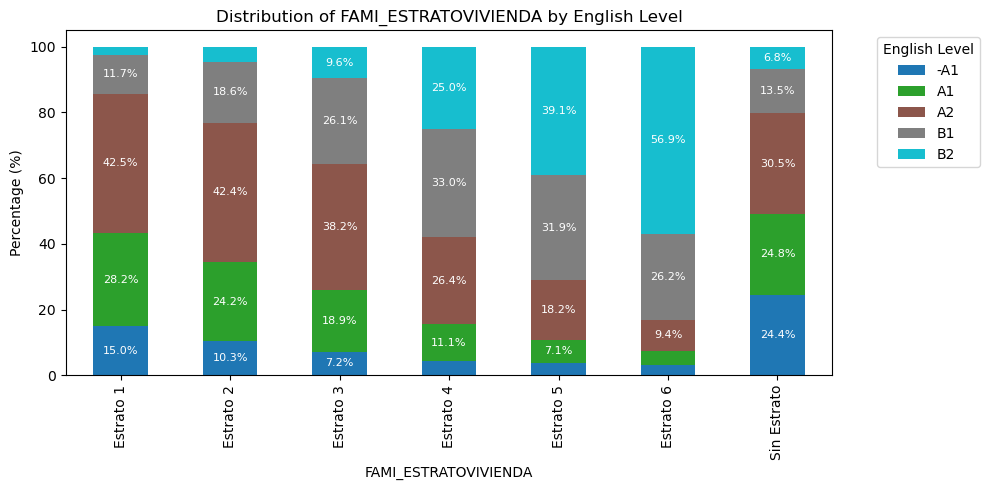

In [22]:
fig = next(cat_gen) 
fig.show()

El desempeño en inglés muestra una clara asociación con el nivel socioeconómico del hogar, representado por el ***estrato de vivienda***. A medida que aumenta el estrato, se observa una mayor proporción de estudiantes en niveles altos de inglés (***B1*** y ***B2***), especialmente a partir del ***estrato 4 en adelante***.

En particular, los estudiantes de ***estrato 6*** presentan un perfil marcadamente distinto: más del ***$56$%*** alcanza el nivel ***B2***, mientras que los niveles bajos (***-A1*** y ***A1***) prácticamente desaparecen. Por el contrario, en los estratos ***1 y 2***, predomina el nivel ***A2*** con más del ***$40$%***, y la presencia de niveles superiores es mínima.

Este patrón evidencia una brecha en el dominio del inglés correlacionada con las condiciones socioeconómicas del estudiante, sugiriendo que el acceso a recursos y oportunidades educativas podría estar mediando el rendimiento lingüístico.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



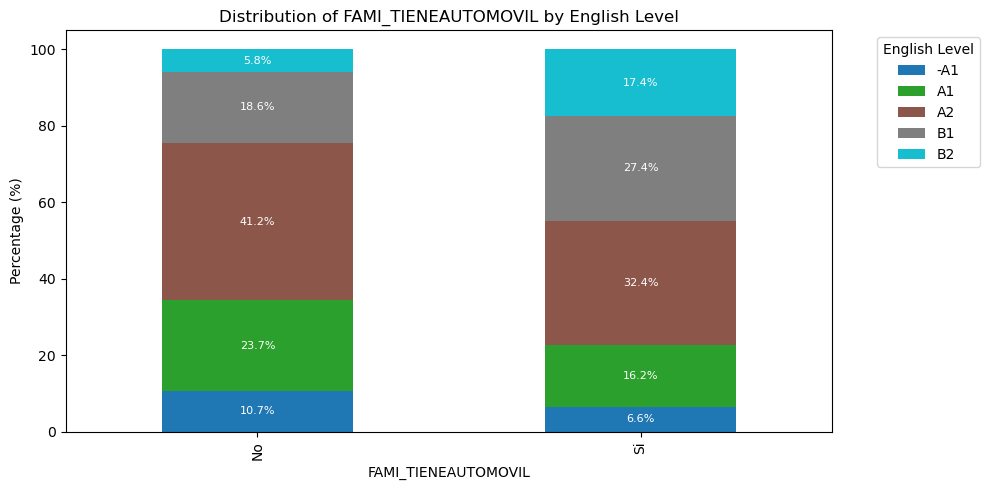

In [23]:
fig = next(cat_gen) 
fig.show()

El acceso a un ***automóvil en el hogar*** también muestra relación con el desempeño en inglés. Entre los estudiantes que ***no tienen automóvil***, la mayoría se concentra en los niveles ***A2*** (***$41.2\%$***) y ***A1*** (***$23.7\%$***), mientras que los niveles superiores como ***B2*** son poco frecuentes (***$5.8\%$***).

Por el contrario, quienes ***sí tienen automóvil*** presentan una distribución más favorable: la proporción de estudiantes en ***nivel B2*** se triplica (***$17.4\%$***), y los niveles ***B1*** y ***B2*** juntos representan más de ***$45\%$*** del total. Al mismo tiempo, los niveles bajos (***-A1*** y ***A1***) disminuyen significativamente.

Este patrón sugiere que la disponibilidad de recursos materiales en el hogar, como el automóvil, puede estar correlacionada con mejores oportunidades de aprendizaje, acceso a educación de calidad o ambientes familiares más propicios para el desarrollo de competencias en inglés.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



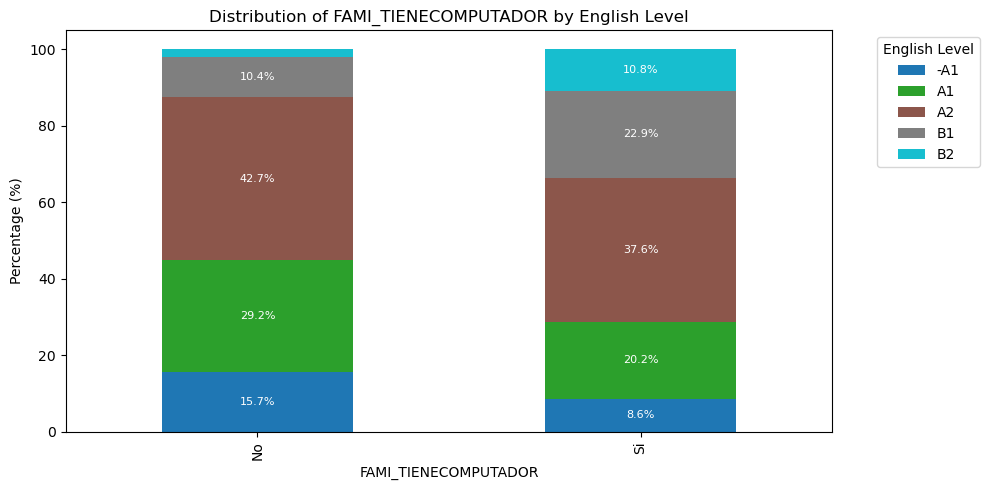

In [24]:
fig = next(cat_gen) 
fig.show()

El acceso a un ***computador en el hogar*** muestra una diferencia clara en el perfil de desempeño en inglés. Los estudiantes que ***no tienen computador*** se concentran mayoritariamente en los niveles ***A2*** ($42.7\%$) y ***A1*** ($29.2\%$), con una presencia mínima en el nivel ***B2*** ($1.9\%$).

En contraste, entre quienes ***sí disponen de computador***, hay una mayor proporción de estudiantes en niveles avanzados: ***B1*** ($22.9\%$) y ***B2*** ($10.8\%$), mientras que los niveles bajos como ***-A1*** y ***A1*** disminuyen a menos del $30\%$ combinados.

Estos resultados refuerzan la hipótesis de que el acceso a tecnologías de información está positivamente asociado con el desarrollo de competencias en inglés, posiblemente debido a una mayor exposición a contenidos digitales y recursos educativos.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



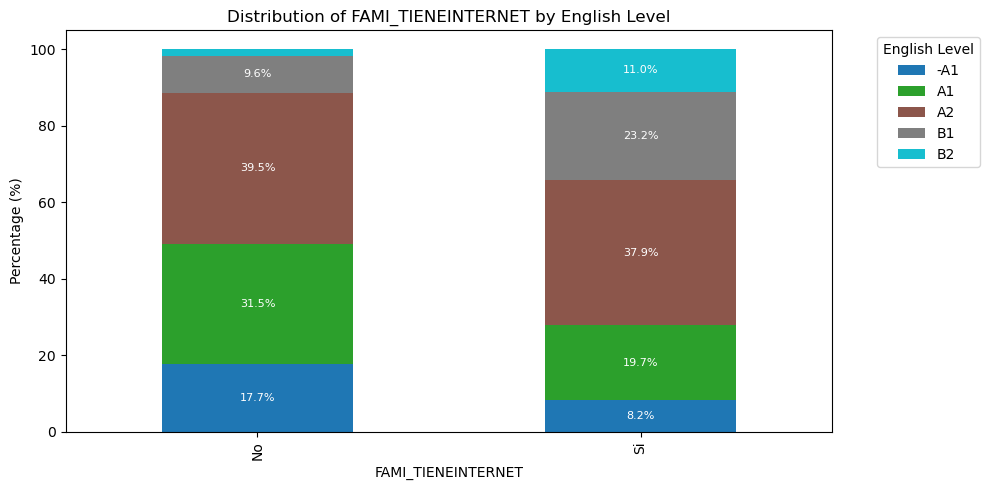

In [25]:
fig = next(cat_gen) 
fig.show()

La presencia de ***internet en el hogar*** también presenta una asociación notable con el desempeño en inglés. Entre los estudiantes que ***no tienen acceso a internet***, la distribución se concentra en los niveles ***A2*** ($39.5\%$) y ***A1*** ($31.5\%$), mientras que los niveles superiores como ***B1*** ($9.6\%$) y ***B2*** ($1.6\%$) son claramente minoritarios.

En contraste, quienes ***sí tienen acceso a internet*** muestran una distribución más dispersa y favorable: el porcentaje en ***B1*** se incrementa hasta $23.2\%$ y el nivel ***B2*** alcanza el $11.0\%$, mientras que los niveles ***-A1*** y ***A1*** bajan a valores significativamente menores.

Estos resultados refuerzan la idea de que el acceso a conectividad digital es un factor facilitador en el desarrollo de competencias lingüísticas, ya que permite exposición constante a contenidos en inglés, aprendizaje autónomo y acceso a plataformas educativas.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



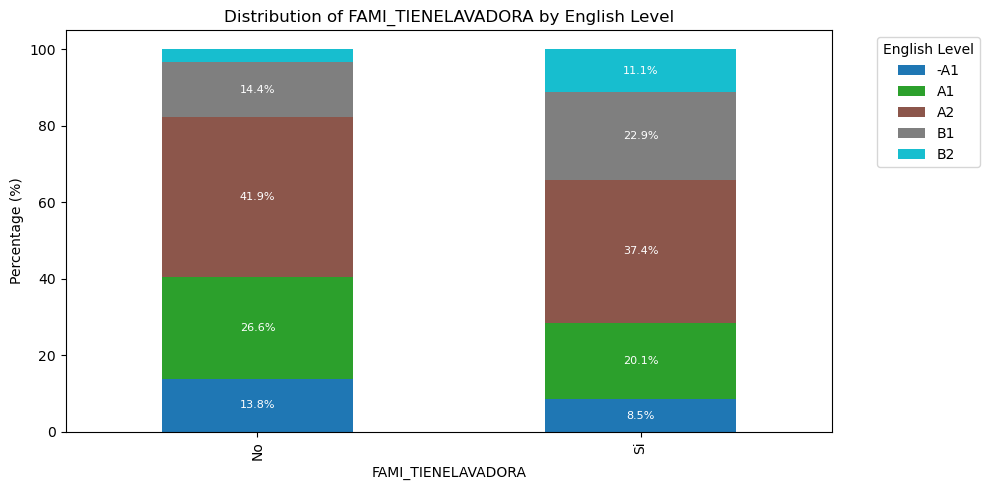

In [26]:
fig = next(cat_gen) 
fig.show()

La disponibilidad de una ***lavadora en el hogar*** también refleja diferencias en el desempeño en inglés. Entre los estudiantes que ***no disponen de lavadora***, predominan los niveles ***A2*** ($41.9\%$) y ***A1*** ($26.6\%$), con una baja representación en niveles avanzados como ***B2*** ($3.3\%$).

En cambio, quienes ***sí cuentan con lavadora*** presentan un perfil más equilibrado: el porcentaje en nivel ***B1*** sube a $23.0\%$ y el nivel ***B2*** alcanza el $11.1\%$, mientras que los niveles bajos (***-A1*** y ***A1***) disminuyen.

Aunque se trata de un bien doméstico básico, su presencia puede actuar como un indicador indirecto del nivel socioeconómico familiar, el cual a su vez parece estar correlacionado con el acceso a mejores condiciones para el aprendizaje del inglés.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



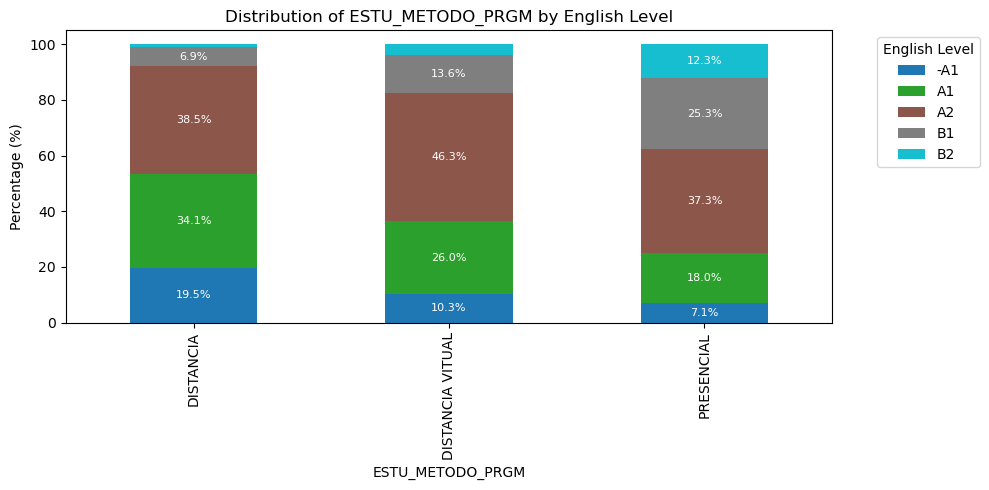

In [27]:
fig = next(cat_gen) 
fig.show()

El ***método de formación académica*** evidencia diferencias marcadas en el nivel de inglés alcanzado por los estudiantes. En programas ***a distancia tradicional***, predominan los niveles bajos: ***A1*** ($34.1\%$) y ***A2*** ($38.5\%$), mientras que solo el $6.9\%$ alcanza el nivel ***B1***.

En los programas ***virtuales***, la distribución está aún más concentrada en ***A2*** ($46.3\%$), y los niveles altos son marginales (***B2*** apenas $1.7\%$), lo que sugiere que este tipo de formación podría estar asociado a un menor dominio del inglés.

Por el contrario, en los programas ***presenciales*** se observa una mayor proporción de estudiantes en niveles avanzados: ***B1*** ($25.3\%$) y ***B2*** ($12.3\%$), con una reducción clara de los niveles ***-A1*** y ***A1***.

Este patrón sugiere que la modalidad presencial podría ofrecer mejores condiciones para el desarrollo de competencias comunicativas, posiblemente por el contacto directo con docentes, mayor interacción y exposición al idioma en contextos educativos formales.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



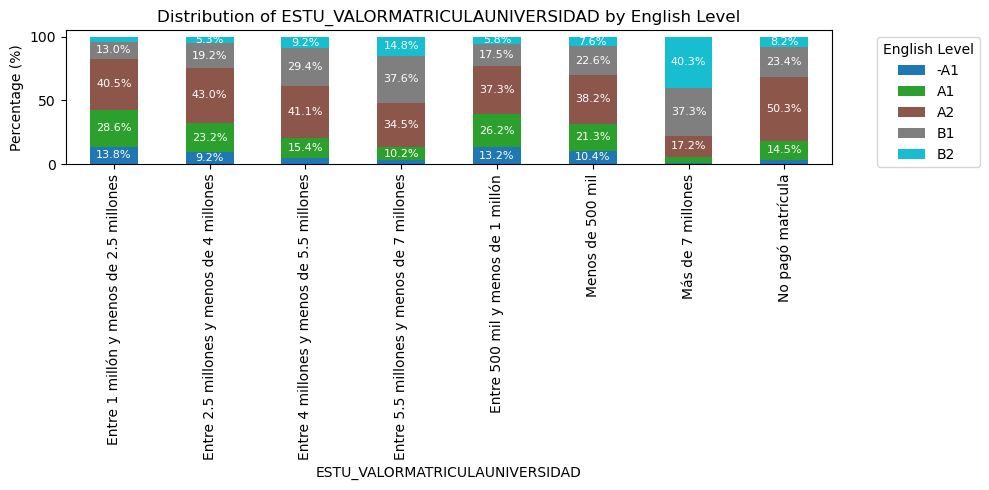

In [28]:
fig = next(cat_gen) 
fig.show()

El ***valor de matrícula pagado por los estudiantes*** muestra una tendencia clara en relación con el nivel de desempeño en inglés. A medida que aumenta el rango de pago, también lo hace la proporción de estudiantes en niveles avanzados, especialmente ***B2***.

Por ejemplo, en el grupo que paga ***más de 7 millones***, el $40.3\%$ alcanza el nivel ***B2***. En contraste, en rangos bajos como ***entre 1 millón y menos de 2.5 millones*** predomina el nivel ***A2*** con más del $40\%$, mientras que ***B2*** cae por debajo del $10\%$.

Una excepción interesante se presenta en los estudiantes que ***no pagaron matrícula***, donde el $50.3\%$ está en ***A2***, y los niveles ***B1*** y ***B2*** juntos superan el $30\%$.

Este patrón refuerza la hipótesis de que el nivel de inversión económica en educación superior está correlacionado con mejores desempeños en inglés, lo cual podría reflejar tanto la calidad institucional como el capital cultural y lingüístico asociado a estratos más altos.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



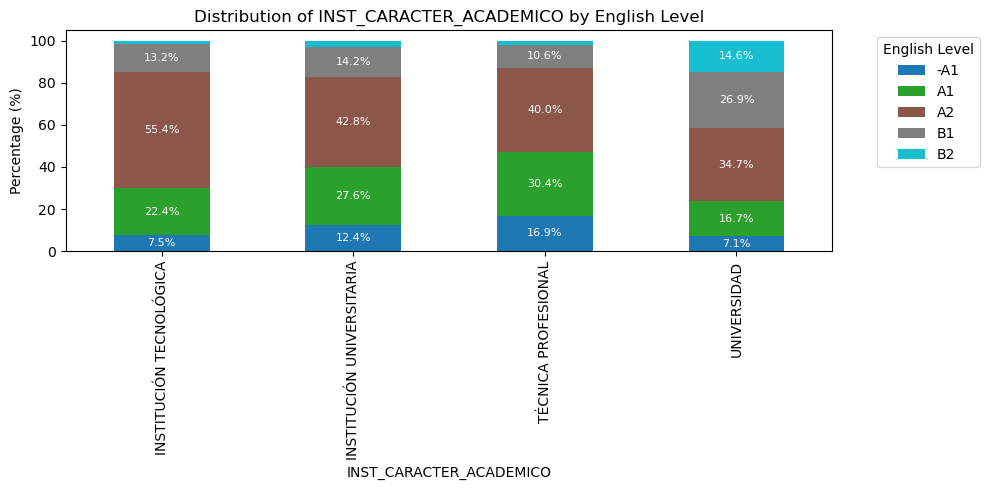

In [29]:
fig = next(cat_gen) 
fig.show()

El ***carácter académico de la institución de educación superior*** refleja diferencias importantes en el dominio del inglés. En las ***instituciones tecnológicas***, el desempeño se concentra en niveles intermedios y bajos: ***A2*** alcanza el $55.4\%$, y ***B2*** solo representa el $1.6\%$ del total.

En las ***instituciones universitarias*** y ***técnicas profesionales***, aunque se observa una ligera mejora en los niveles ***B1*** y ***B2***, ***A2*** sigue siendo el nivel predominante, con valores de $42.8\%$ y $40.0\%$, respectivamente.

En contraste, los estudiantes de ***universidades*** presentan una distribución más favorable: el porcentaje en ***B1*** sube a $26.9\%$ y en ***B2*** a $14.6\%$, mientras que ***A2*** baja al $34.7\%$, mostrando un perfil de mayor competencia lingüística.

Esto sugiere que las universidades, posiblemente por su enfoque más académico, recursos institucionales y exigencias curriculares, promueven un mejor desarrollo en competencias en inglés que otros tipos de instituciones de educación superior.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



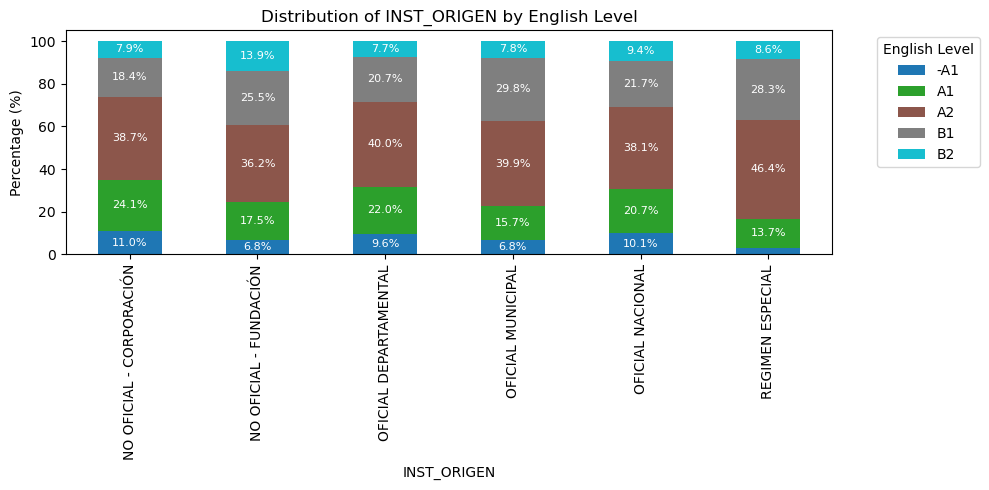

In [30]:
fig = next(cat_gen) 
fig.show()

El ***origen institucional*** también evidencia diferencias en el desempeño en inglés. En instituciones de tipo ***NO OFICIAL - FUNDACIÓN*** se observa la proporción más alta de estudiantes en nivel ***B1*** ($25.5\%$) y una participación relativamente baja en ***-A1*** ($6.7\%$), lo que sugiere una distribución más equilibrada.

En contraste, instituciones ***OFICIALES MUNICIPALES*** y ***DEPARTAMENTALES*** presentan una concentración marcada en ***A2*** (más del $39\%$) y niveles bajos, con una menor representación en ***B2*** (inferior al $9\%$).

El grupo de ***RÉGIMEN ESPECIAL*** muestra el mayor porcentaje de estudiantes en ***nivel A2*** ($46.4\%$) y el menor en ***A1*** ($13.7\%$), con una representación media en los niveles altos.

Estos resultados indican que el tipo de institución, posiblemente asociado a su autonomía, enfoque curricular o recursos disponibles, puede influir en el desarrollo de habilidades en inglés.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



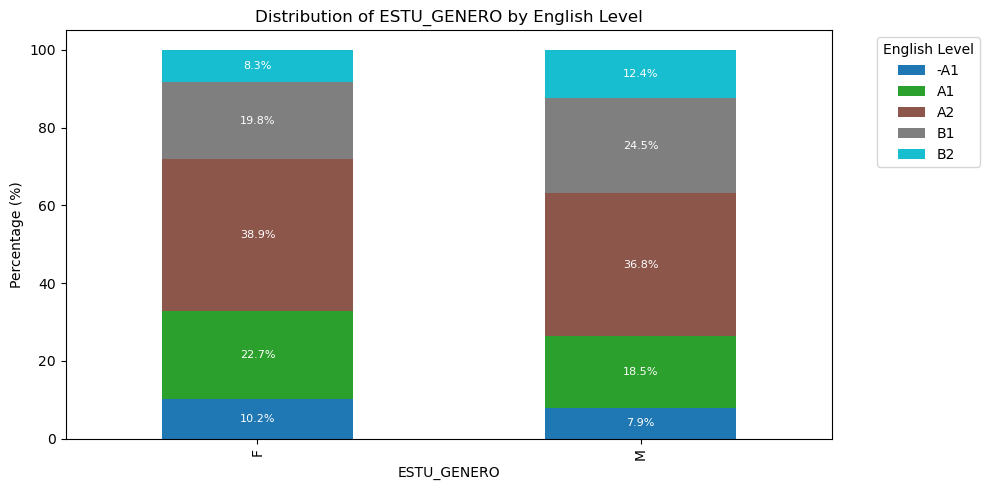

In [31]:
fig = next(cat_gen) 
fig.show()

El análisis por ***género*** muestra diferencias sutiles pero consistentes en los niveles de desempeño en inglés. Las estudiantes identificadas como ***Femeninas (F)*** presentan una mayor concentración en niveles bajos e intermedios, especialmente en ***A2*** ($38.9\%$) y ***A1*** ($22.7\%$), mientras que los niveles avanzados como ***B2*** alcanzan apenas el $8.3\%$.

Por otro lado, los estudiantes ***Masculinos (M)*** muestran una distribución más favorable hacia los niveles altos: ***B1*** ($24.5\%$) y ***B2*** ($12.4\%$), con menores proporciones en los niveles ***-A1*** ($7.9\%$) y ***A1*** ($18.5\%$).

Aunque la diferencia no es drástica, el patrón sugiere que los hombres tienden a obtener resultados ligeramente superiores en inglés dentro del conjunto de datos analizado. Este comportamiento podría estar influenciado por factores como el acceso a recursos, diferencias en estrategias de aprendizaje o enfoques pedagógicos diferenciados por género.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



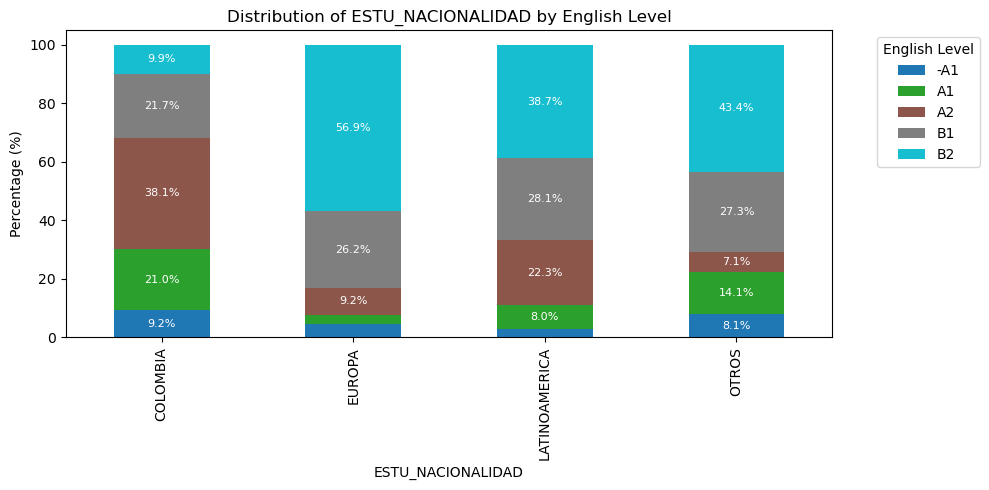

In [32]:
fig = next(cat_gen) 
fig.show()

La variable ***horas semanales de trabajo del estudiante*** muestra una relación con el desempeño en inglés. Aquellos que ***no trabajan*** presentan una distribución claramente inclinada hacia los niveles altos, con un ***18.4\%*** en ***B2*** y un ***29\%*** en ***B1***, siendo estos los valores más altos en comparación con cualquier otro grupo.

A medida que aumentan las horas de trabajo, especialmente a partir de las ***21 horas o más***, la proporción de estudiantes en niveles ***B1*** y ***B2*** disminuye progresivamente. Por ejemplo, en el grupo que trabaja ***más de 30 horas***, solo el ***7.0\%*** alcanza el nivel ***B2***, mientras que el ***41.2\%*** se ubica en ***A2***, el valor más alto entre todos los grupos.

Este patrón sugiere que una mayor carga laboral semanal podría limitar el tiempo o la energía disponible para el estudio, afectando negativamente el desarrollo de habilidades en inglés. Por el contrario, no trabajar o hacerlo por pocas horas parece estar asociado a mejores resultados.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



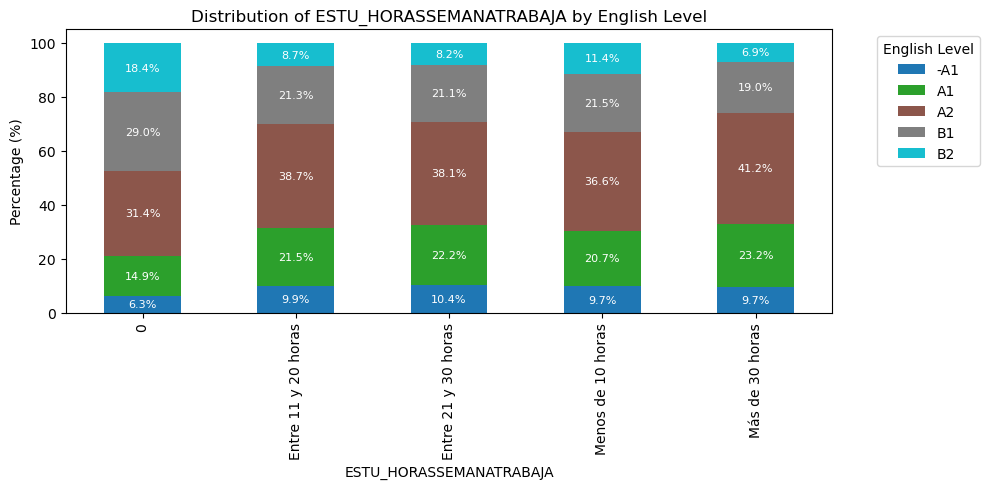

In [33]:
fig = next(cat_gen) 
fig.show()

El análisis según si el estudiante ***paga su matrícula con beca*** revela diferencias leves pero consistentes en los niveles de desempeño en inglés. Aquellos que ***no cuentan con beca*** se concentran principalmente en los niveles ***A2*** ($37.7\%$) y ***A1*** ($21.9\%$), mientras que solo el $9.6\%$ alcanza el nivel ***B2***.

Por otro lado, los estudiantes que ***sí pagan su matrícula con beca*** presentan una mayor proporción en los niveles avanzados: ***B1*** ($24.2\%$) y ***B2*** ($11.5\%$), junto con una reducción de los niveles más bajos, especialmente ***-A1*** ($7.3\%$).

Este comportamiento sugiere que las becas no solo alivian la carga financiera, sino que también podrían estar asociadas a estudiantes con mejor rendimiento académico general, incluyendo su desempeño en inglés. Alternativamente, el acceso a becas puede reflejar trayectorias educativas con mayor apoyo institucional.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



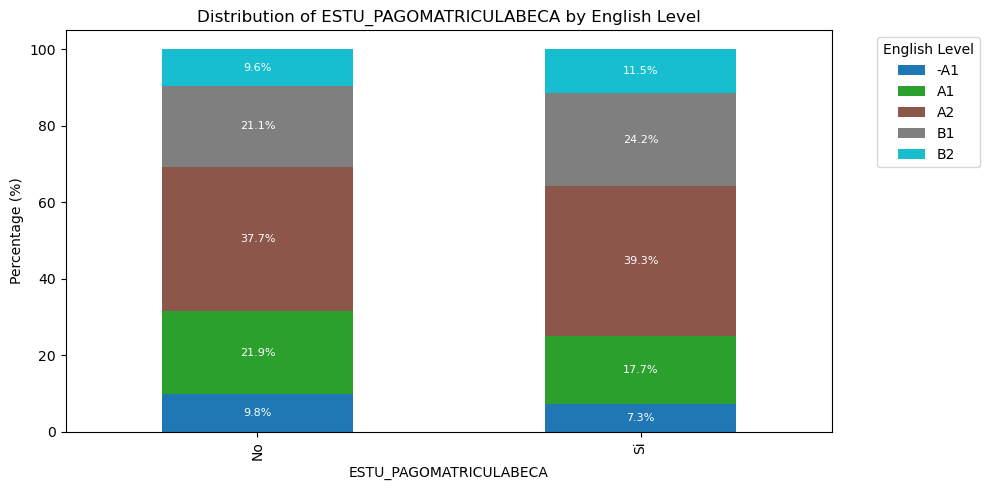

In [34]:
fig = next(cat_gen) 
fig.show()

El uso de ***créditos educativos para pagar la matrícula*** muestra una asociación leve pero muy diferenciada con el desempeño en inglés. Los estudiantes que ***no utilizan crédito*** tienen una distribución más equilibrada, con un $11.1\%$ en ***B2*** y un $22.5\%$ en ***B1***, mientras que los niveles bajos (***-A1*** y ***A1***) representan el $28.8\%$ combinado.

En cambio, quienes ***sí financian su matrícula con crédito*** presentan una ligera reducción en los niveles avanzados: ***B2*** baja a $7.5\%$ y ***B1*** a $20.1\%$, mientras que los niveles ***A2*** y ***A1*** aumentan a $39\%$ y $23.2\%$, respectivamente.

Aunque la diferencia no es extrema, podría interpretarse que quienes dependen de crédito educativo enfrentan mayores restricciones económicas o presión académica, lo que podría influir marginalmente en su rendimiento en inglés.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



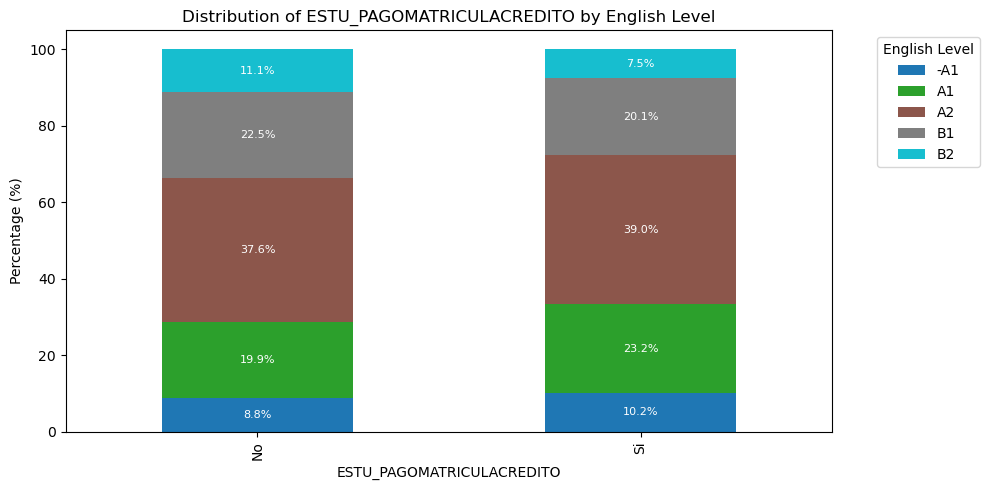

In [35]:
fig = next(cat_gen) 
fig.show()

El hecho de que la ***matrícula sea pagada por los padres*** se asocia claramente con mejores niveles de desempeño en inglés. Entre quienes ***no cuentan con apoyo económico de sus padres***, predominan los niveles ***A2*** ($41.0\%$) y ***A1*** ($24.7\%$), mientras que solo el $5.7\%$ alcanza ***B2***.

En cambio, los estudiantes cuya matrícula ***sí es financiada por sus padres*** presentan un perfil marcadamente distinto: el porcentaje en ***B2*** aumenta a $14.2\%$ y en ***B1*** a $26.4\%$, mientras que los niveles más bajos (***-A1*** y ***A1***) bajan considerablemente.

Este comportamiento sugiere que el respaldo económico familiar no solo alivia la carga financiera del estudiante, sino que también puede estar asociado a contextos educativos más estables, mayor tiempo disponible para el estudio, o acceso a mejores instituciones, lo que puede estar impactando positivamente en el desarrollo de competencias en inglés.

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1426919255.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



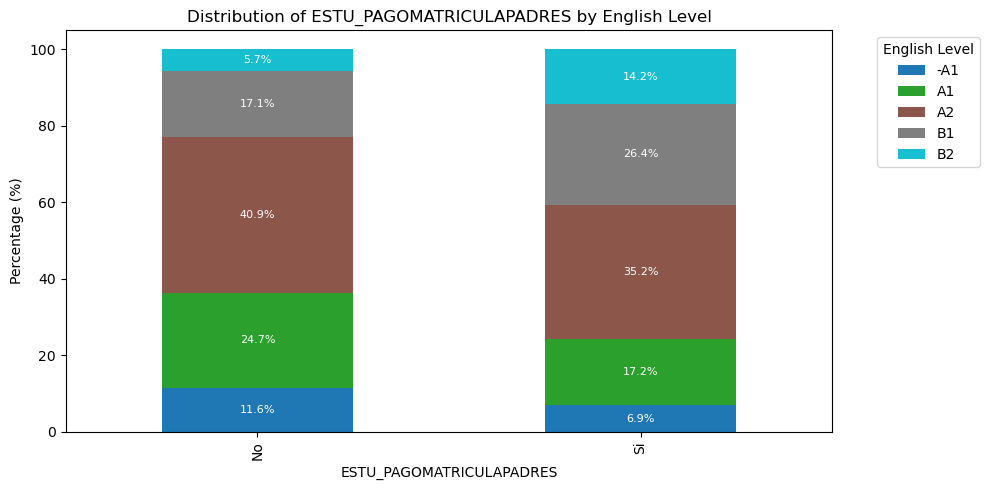

In [36]:
fig = next(cat_gen) 
fig.show()

El hecho de que el estudiante ***pague por sí mismo la matrícula*** parece estar asociado con un menor desempeño en inglés. Entre quienes ***no pagan la matrícula por cuenta propia***, se observa una mayor proporción en los niveles altos: ***B1*** ($26.3\%$) y ***B2*** ($14.1\%$), con solo $6.9\%$ en el nivel ***-A1***.

En contraste, los estudiantes que ***sí financian directamente su educación*** presentan una concentración mayor en los niveles bajos e intermedios: ***A1*** ($25.9\%$) y ***A2*** ($41.2\%$), mientras que la proporción en ***B2*** cae a menos del $5\%$.

Este patrón sugiere que asumir personalmente el costo de la matrícula puede estar vinculado a condiciones económicas más restrictivas, lo que podría limitar el acceso a entornos educativos de calidad o generar mayores cargas de tiempo y estrés, afectando así el desarrollo de competencias como el inglés.

### ***Análisis Univariado***

In [37]:
def plot_categorical_vars_gen(df, vars_, max_categories=20):
    for var in vars_:
        fig, ax = plt.subplots(figsize=(10, 8))

        value_counts = df[var].value_counts().head(max_categories)

        bars = ax.bar(x=value_counts.index, height=value_counts.values)

        colors = matplotlib.colormaps['tab10'].colors
        for i, bar in enumerate(bars):
            bar.set_color(colors[i % len(colors)])

        ax.set_title(f'Counts for {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')

        ax.tick_params(axis='x', rotation=45, labelsize=8)
        plt.xticks(ha='right')

        plt.tight_layout()
        yield fig



features = [col for col in df_reduced.columns if col != 'MOD_INGLES_DESEM']

cat_gen = plot_categorical_vars_gen(df_reduced, features)

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



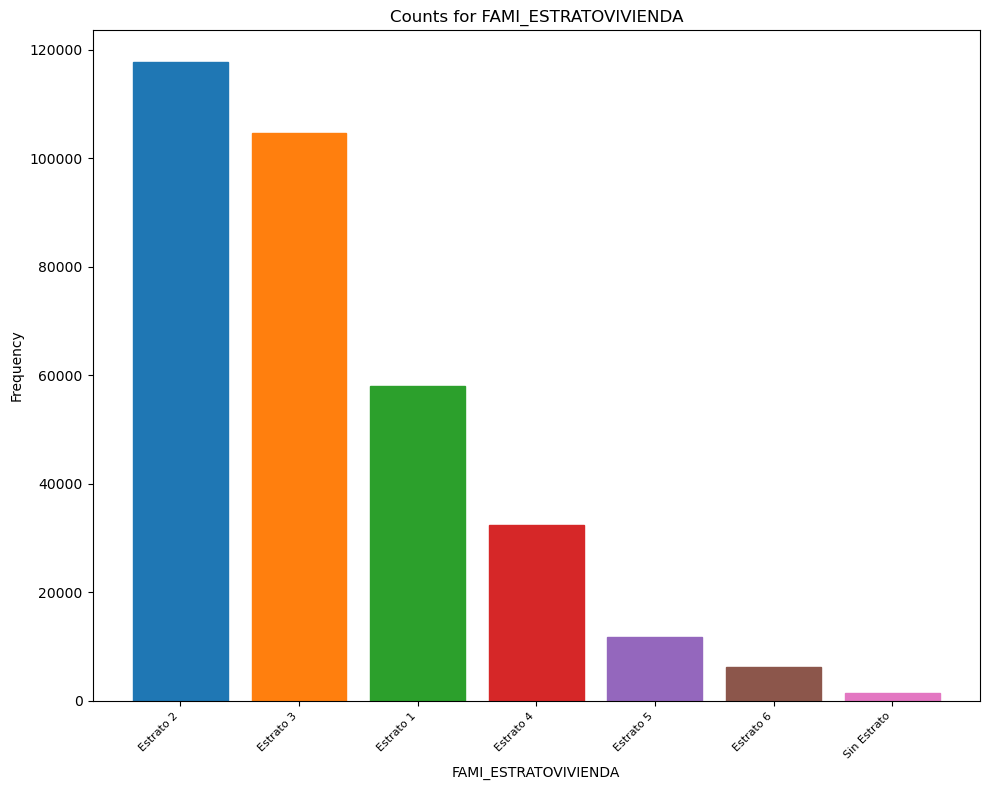

In [38]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



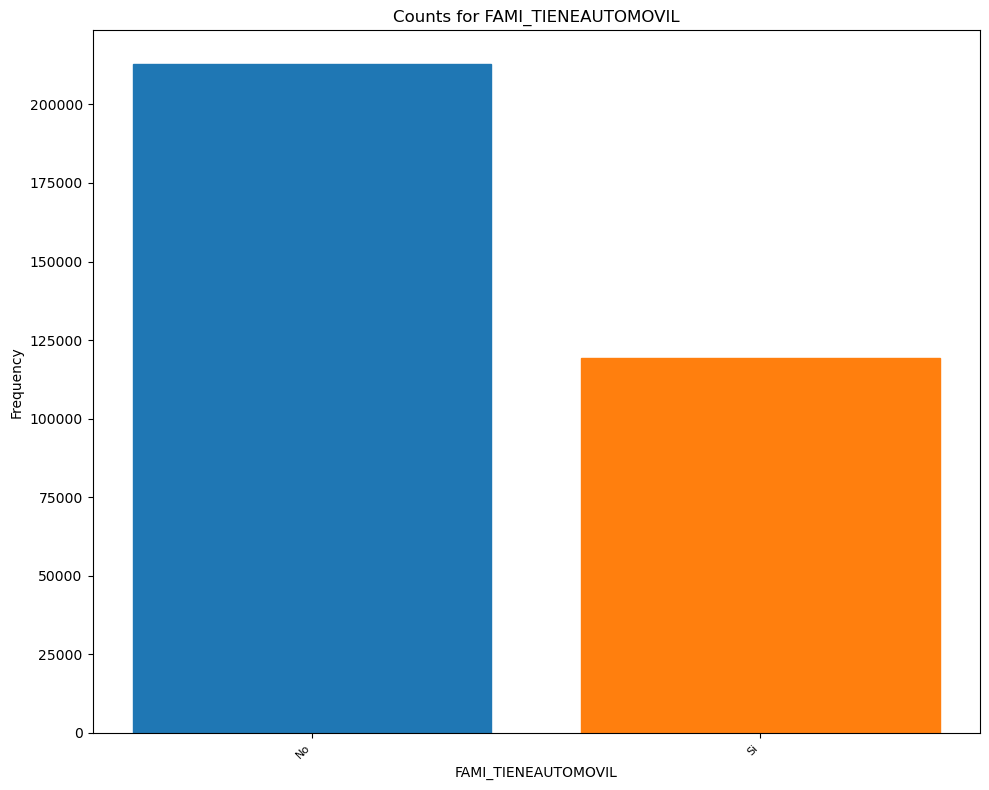

In [39]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



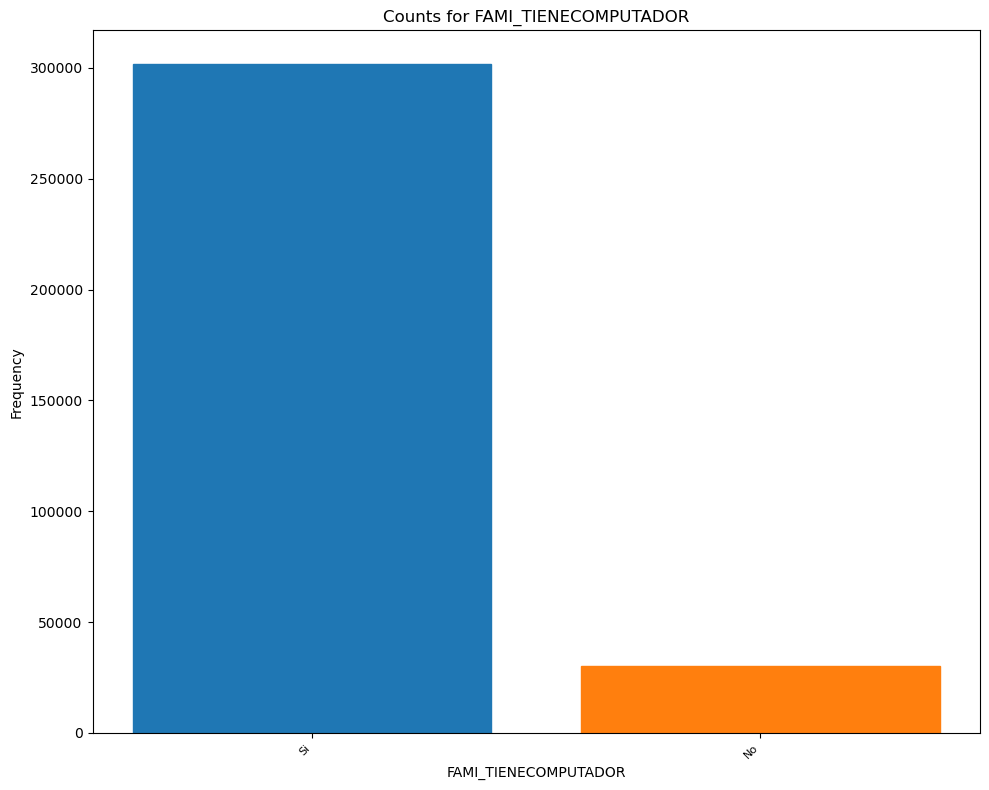

In [40]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



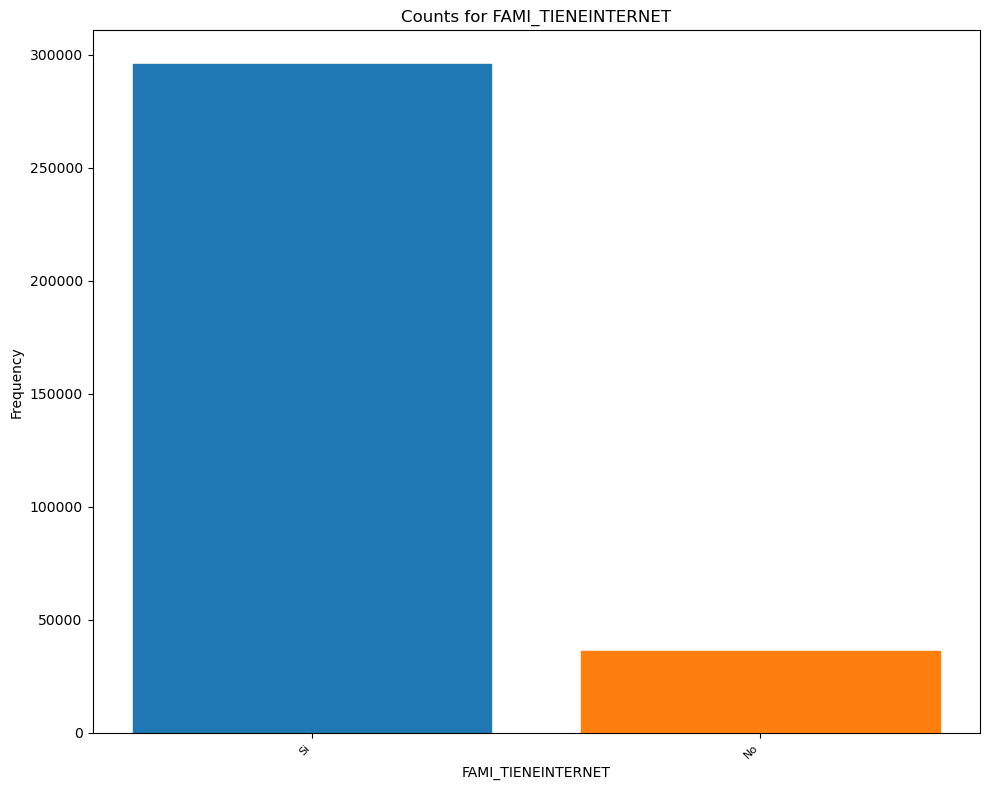

In [41]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



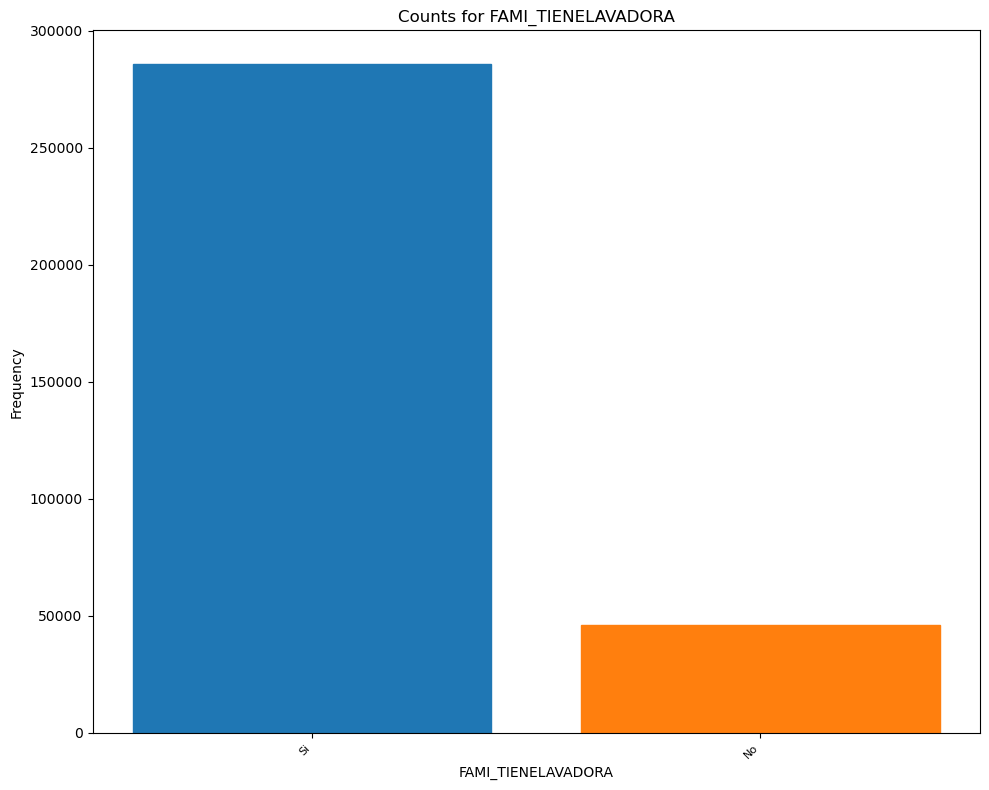

In [42]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/1689294998.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



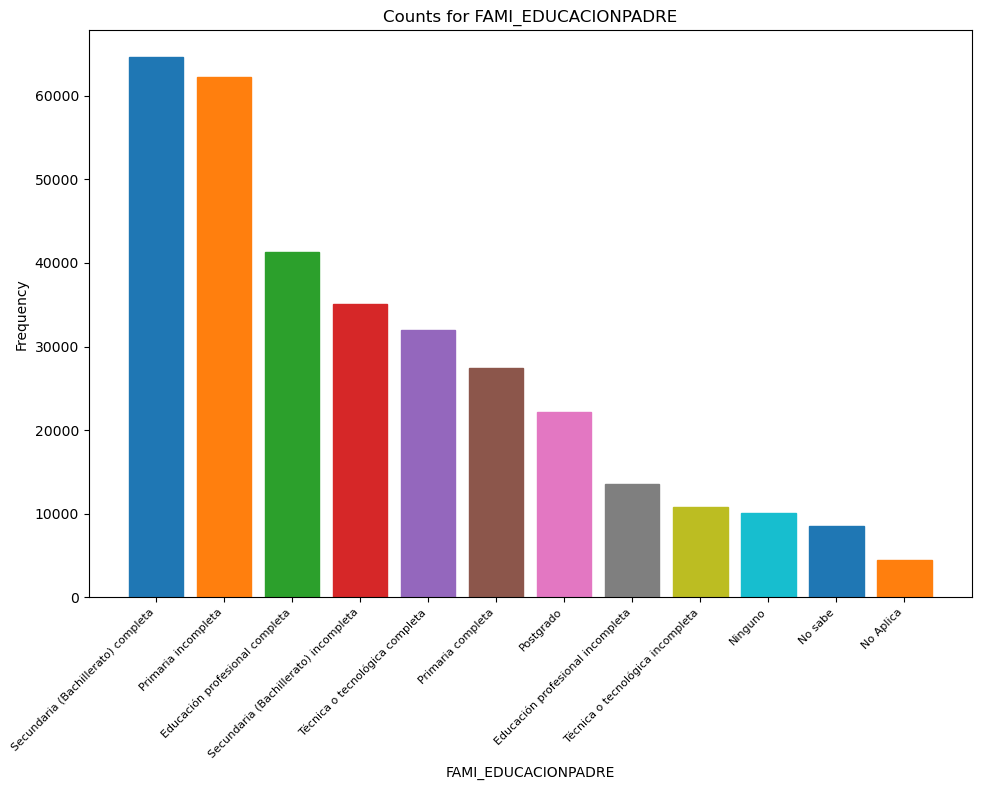

In [43]:
fig = next(cat_gen) # Este no se ve bien
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



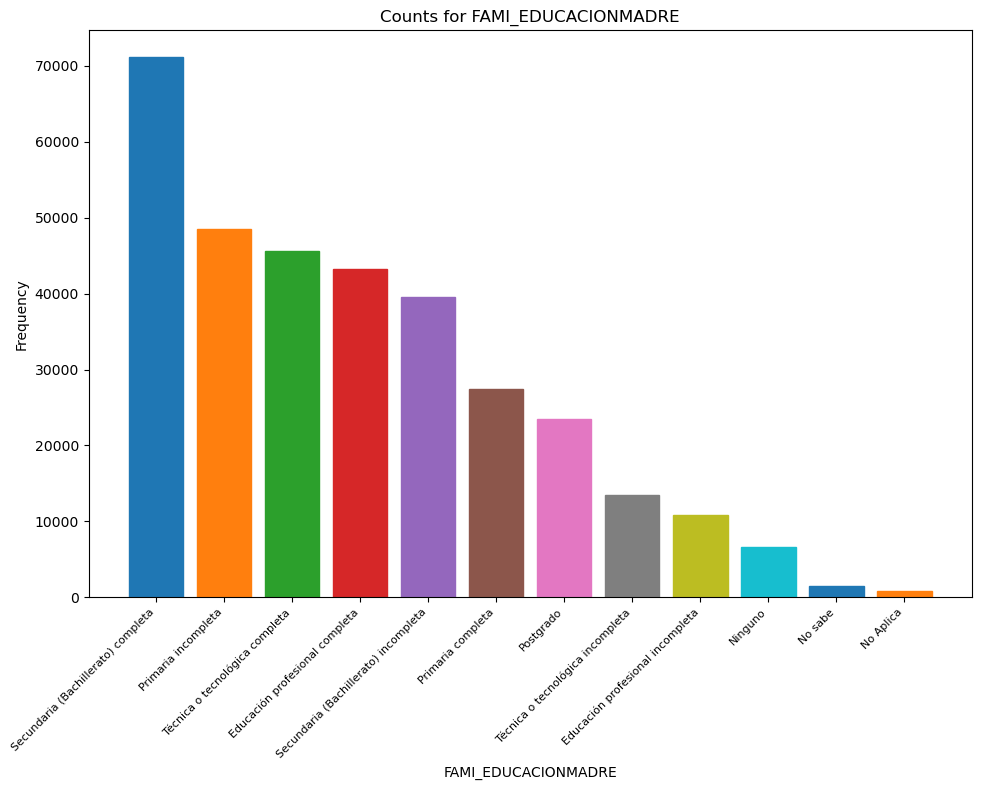

In [44]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



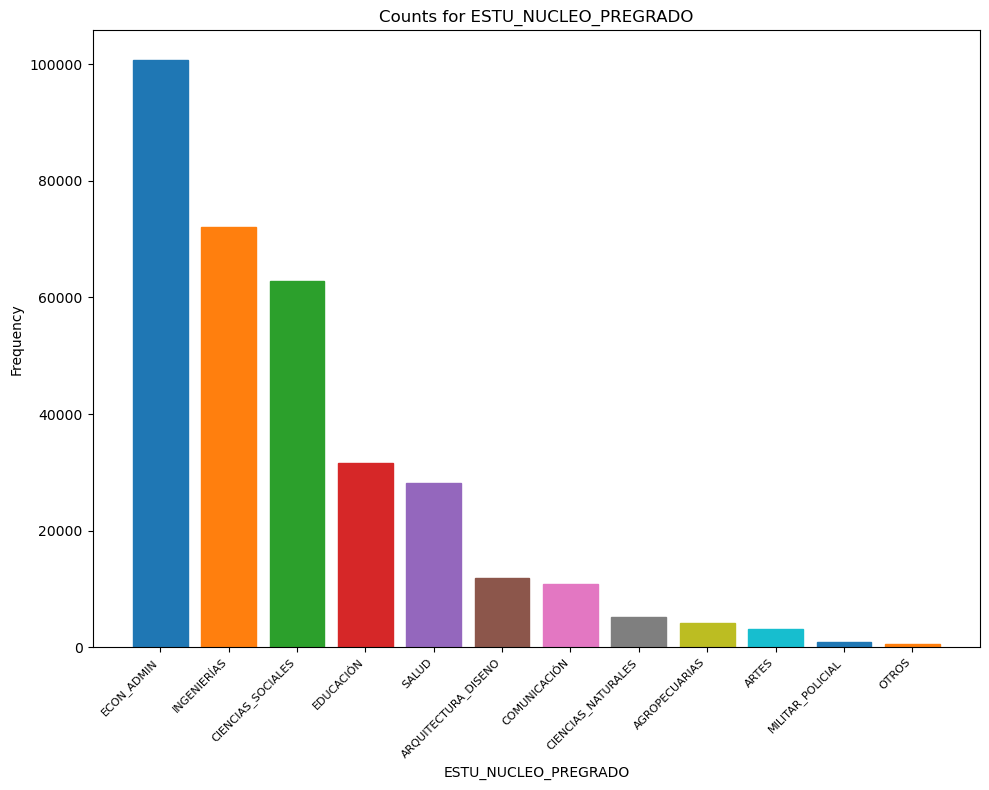

In [45]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



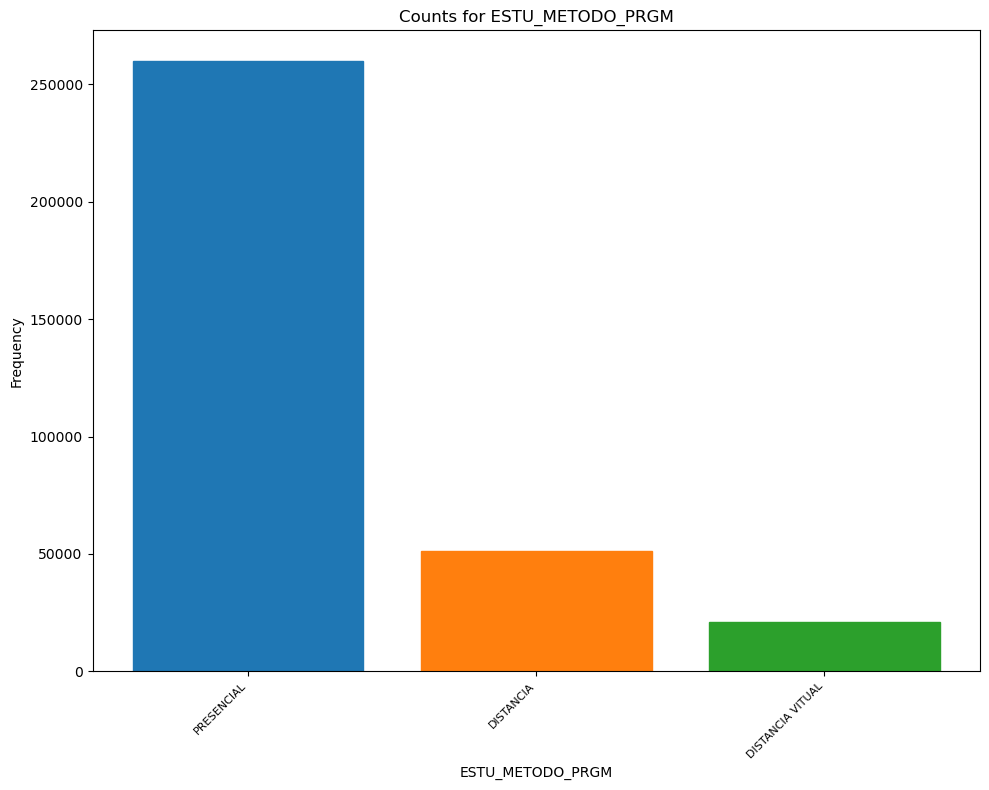

In [46]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



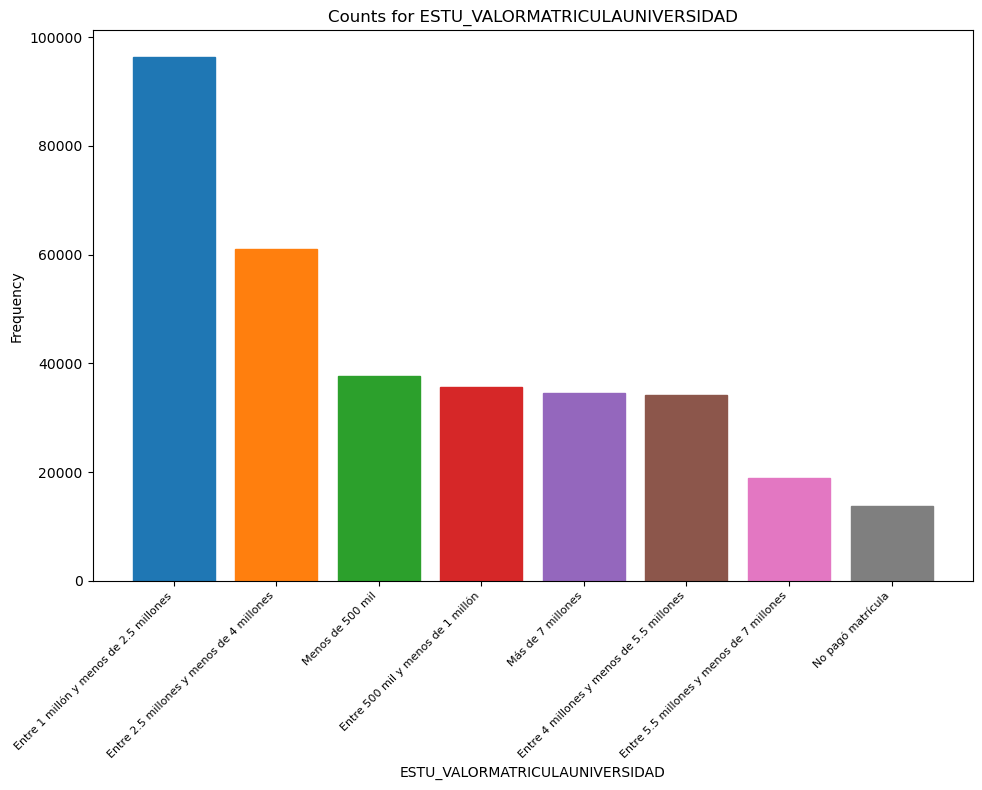

In [47]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



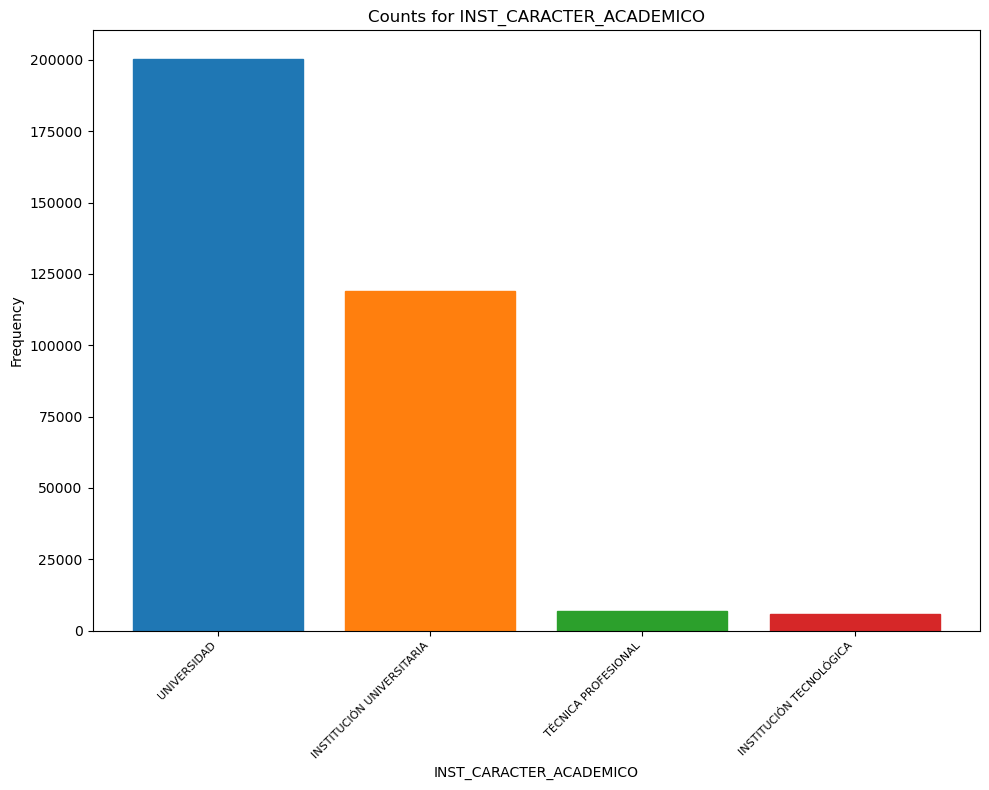

In [48]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



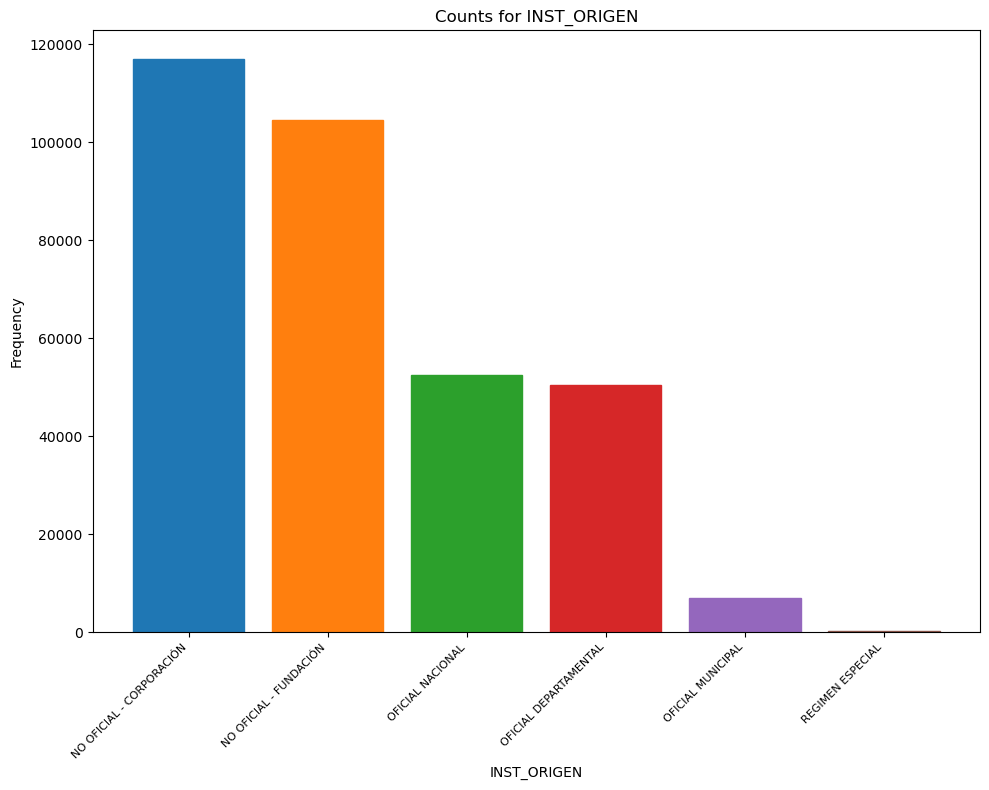

In [49]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



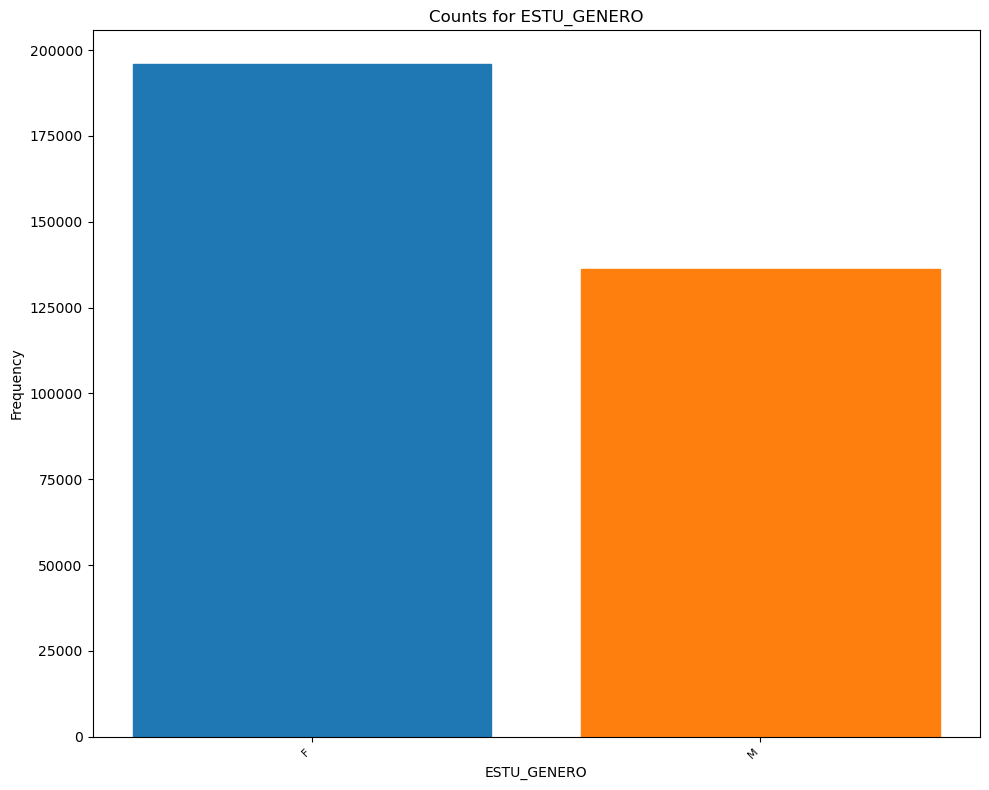

In [50]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



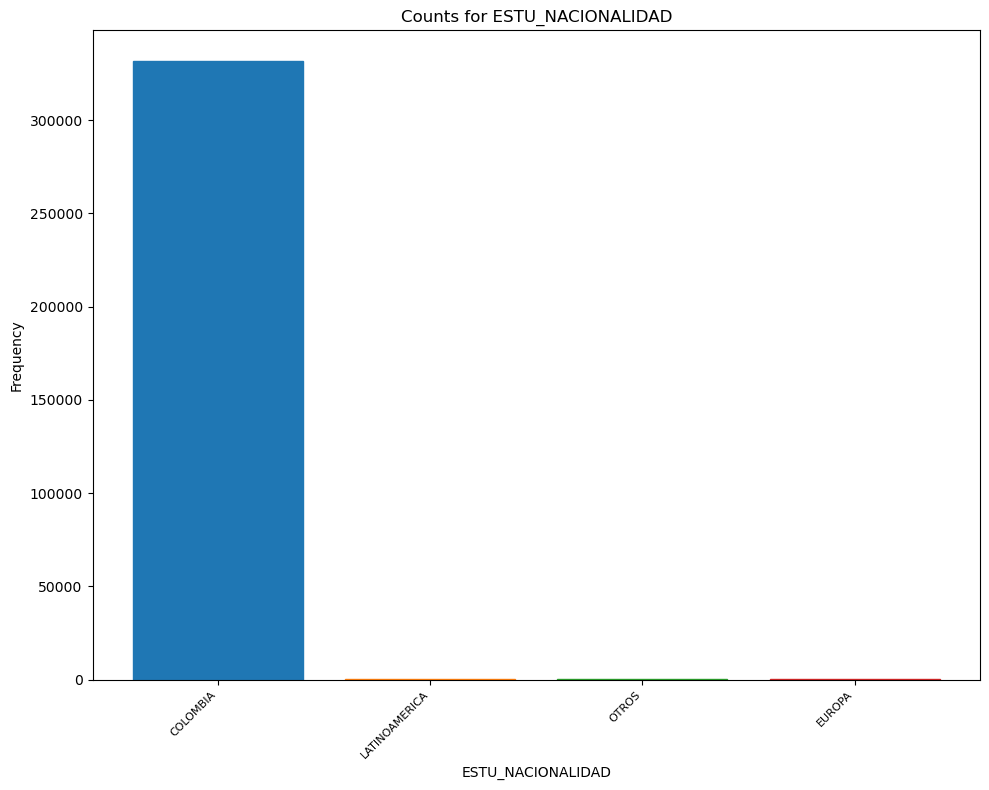

In [51]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



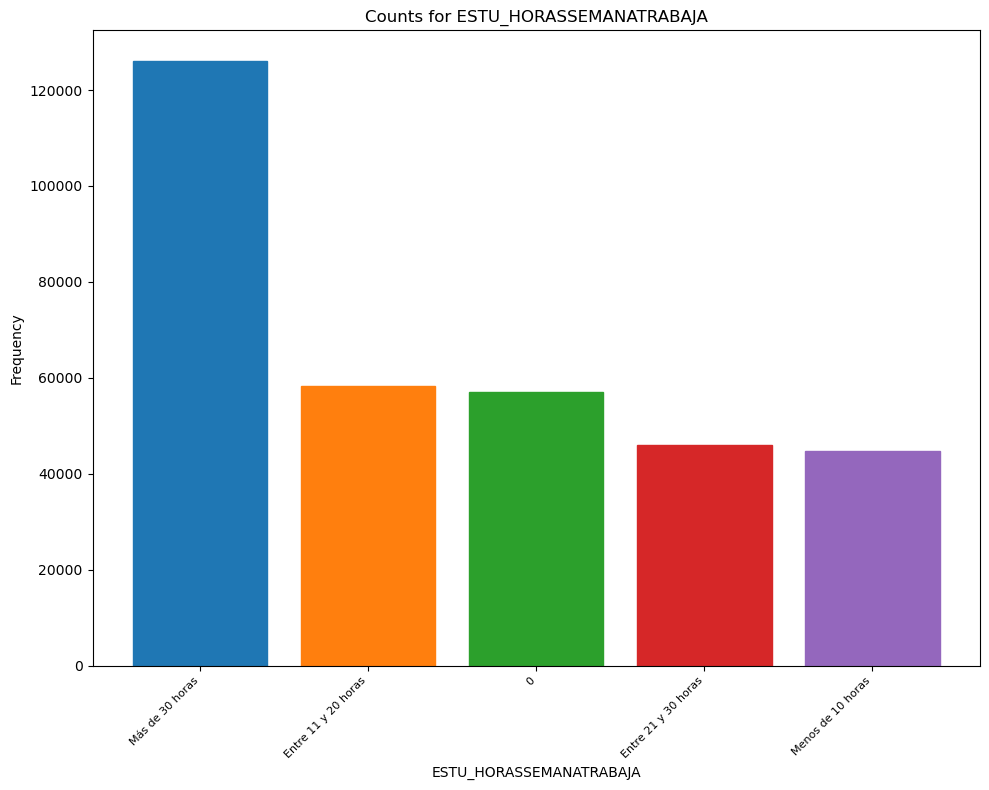

In [52]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



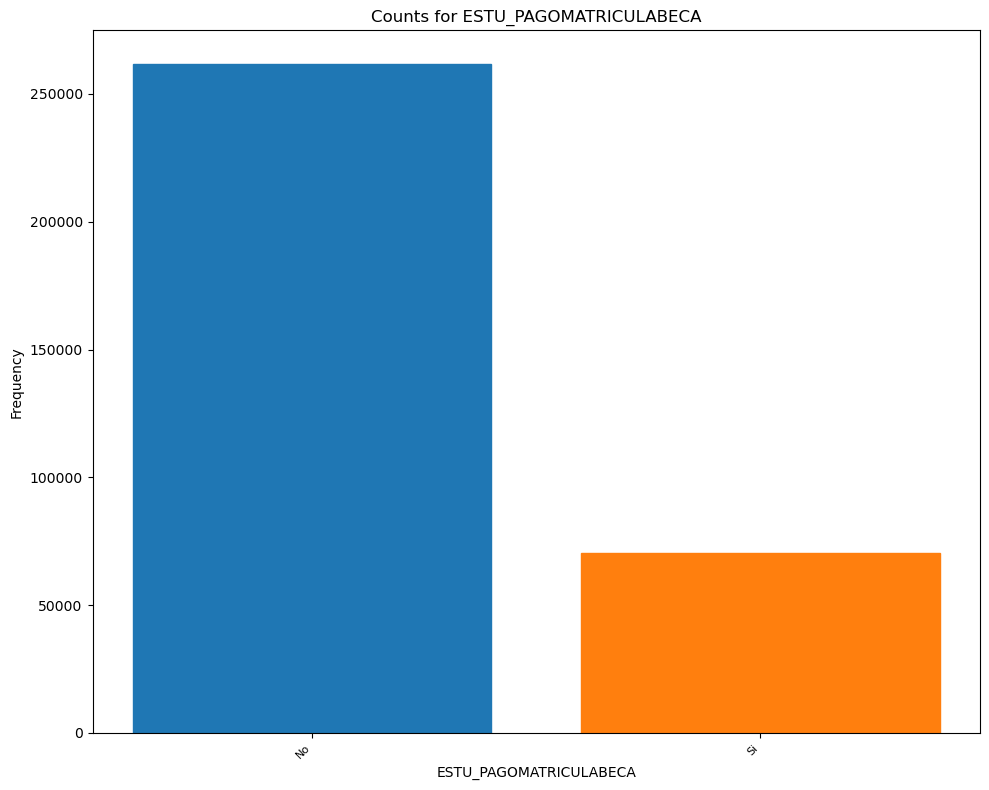

In [53]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



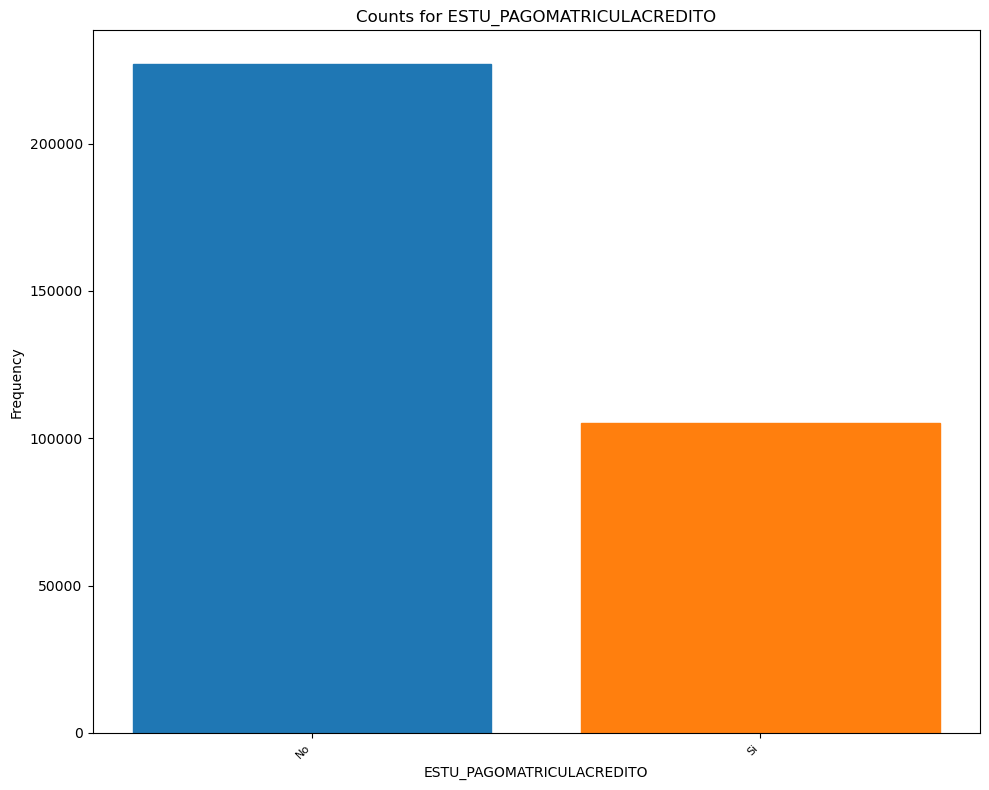

In [54]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



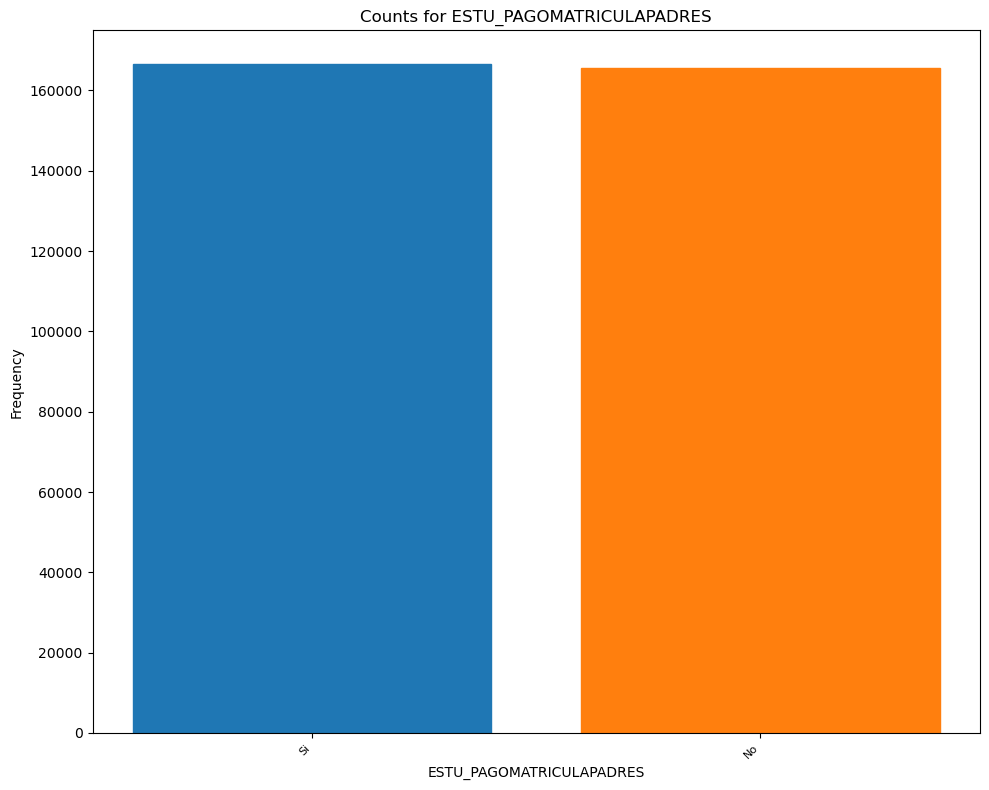

In [55]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



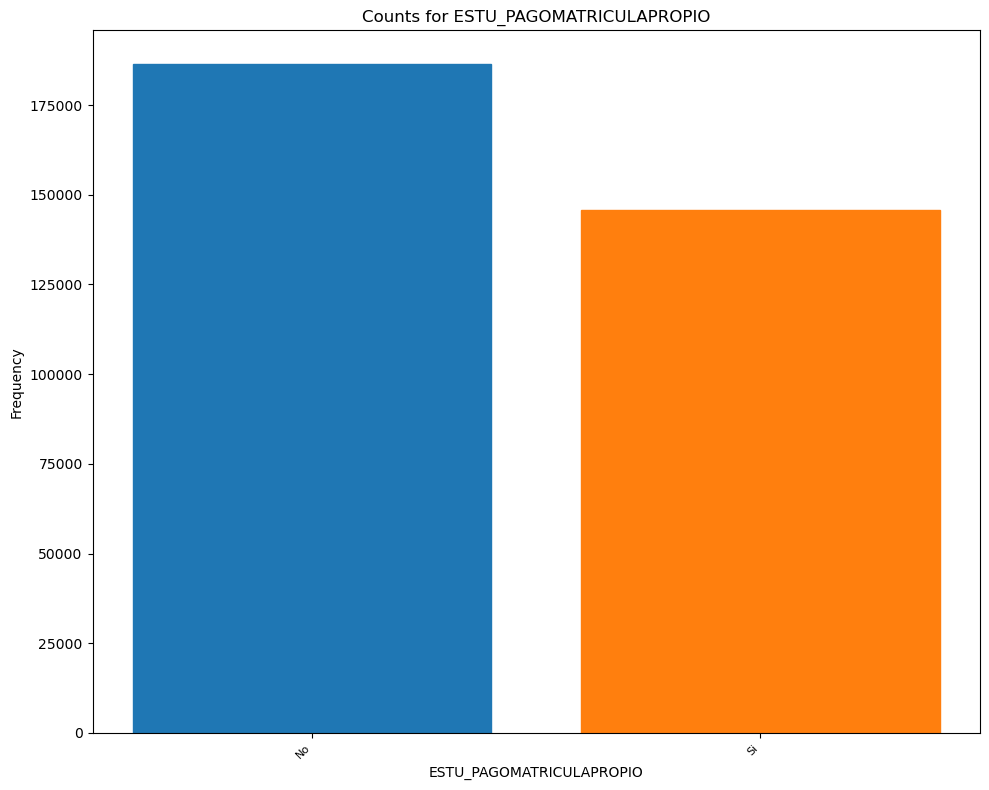

In [56]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



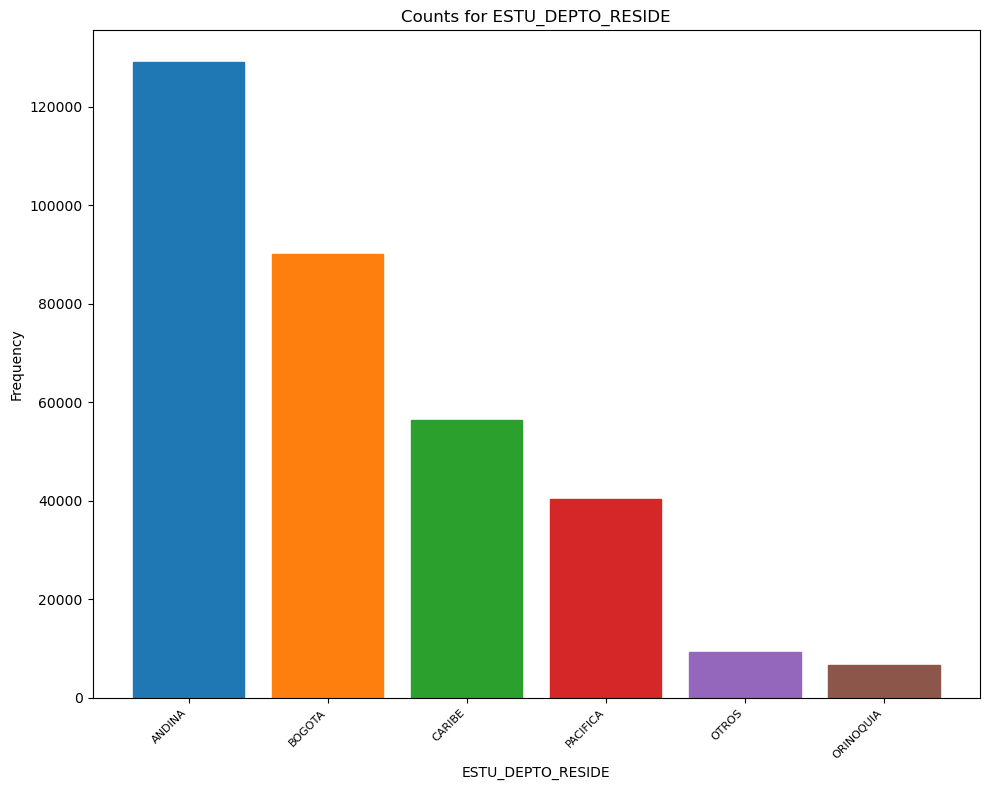

In [57]:
fig = next(cat_gen)
fig.show()

/var/folders/_g/cvyjp6gs3f3dmxh_xzsntrkw0000gn/T/ipykernel_91465/3295620406.py:2: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



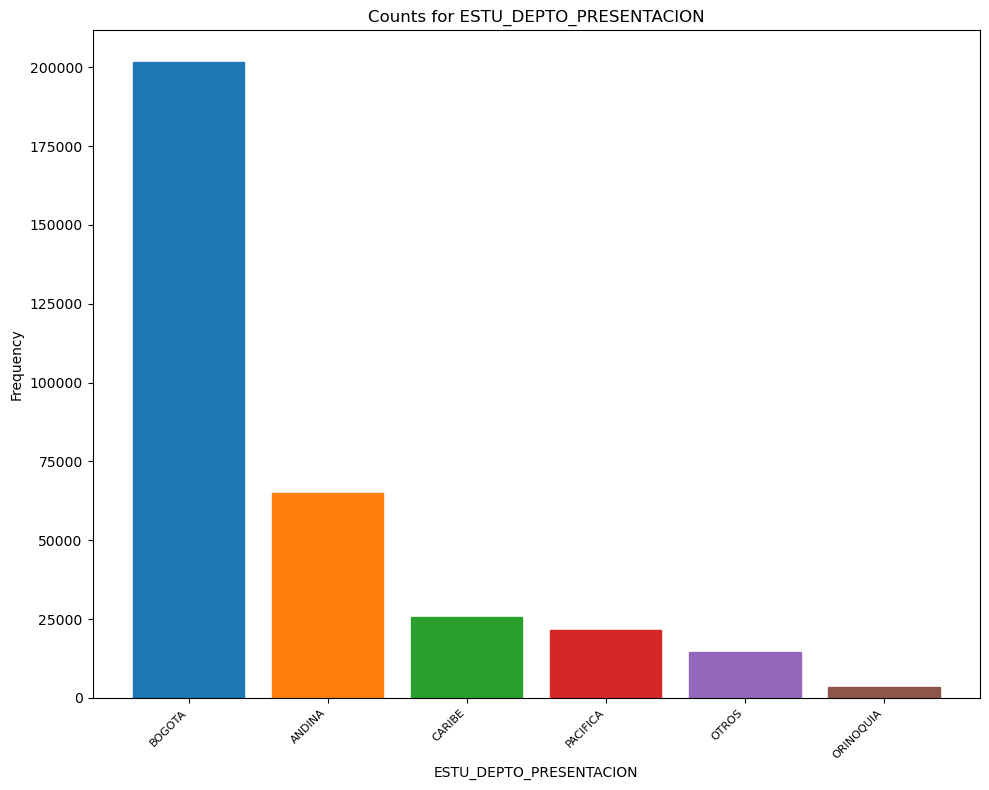

In [58]:
fig = next(cat_gen)
fig.show()

In [59]:
df_reduced.to_csv("../Datos_Saber_Pro_Preprocesed.csv", index=False)

In [60]:
df_reduced

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_NUCLEO_PREGRADO,ESTU_METODO_PRGM,ESTU_VALORMATRICULAUNIVERSIDAD,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_GENERO,ESTU_NACIONALIDAD,ESTU_HORASSEMANATRABAJA,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_DEPTO_RESIDE,ESTU_DEPTO_PRESENTACION,MOD_INGLES_DESEM
0,Estrato 2,No,Si,Si,Si,Técnica o tecnológica completa,Técnica o tecnológica completa,AGROPECUARIAS,PRESENCIAL,Entre 500 mil y menos de 1 millón,UNIVERSIDAD,OFICIAL DEPARTAMENTAL,M,COLOMBIA,Menos de 10 horas,Si,No,Si,No,ANDINA,ANDINA,A2
1,Estrato 2,No,Si,Si,Si,Primaria incompleta,Técnica o tecnológica completa,ECON_ADMIN,PRESENCIAL,Entre 2.5 millones y menos de 4 millones,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - FUNDACIÓN,M,COLOMBIA,Entre 21 y 30 horas,Si,No,Si,No,ANDINA,BOGOTA,B1
2,Estrato 2,No,Si,Si,Si,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,ECON_ADMIN,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - CORPORACIÓN,M,COLOMBIA,Más de 30 horas,No,Si,No,No,CARIBE,CARIBE,A1
3,Estrato 3,No,Si,Si,No,Educación profesional completa,Educación profesional incompleta,ARQUITECTURA_DISENO,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,INSTITUCIÓN UNIVERSITARIA,OFICIAL DEPARTAMENTAL,F,COLOMBIA,Más de 30 horas,No,Si,Si,No,CARIBE,CARIBE,A1
4,Estrato 2,No,Si,Si,Si,No sabe,Técnica o tecnológica completa,INGENIERÍAS,PRESENCIAL,Más de 7 millones,UNIVERSIDAD,NO OFICIAL - CORPORACIÓN,F,COLOMBIA,Entre 21 y 30 horas,Si,No,No,No,BOGOTA,BOGOTA,B1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332223,Estrato 2,No,Si,Si,Si,Postgrado,Técnica o tecnológica completa,SALUD,PRESENCIAL,Más de 7 millones,UNIVERSIDAD,NO OFICIAL - CORPORACIÓN,F,COLOMBIA,Más de 30 horas,Si,Si,No,No,CARIBE,BOGOTA,A1
332224,Estrato 3,Si,Si,Si,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,INGENIERÍAS,PRESENCIAL,Entre 5.5 millones y menos de 7 millones,UNIVERSIDAD,NO OFICIAL - FUNDACIÓN,F,COLOMBIA,Más de 30 horas,No,Si,Si,No,BOGOTA,BOGOTA,B1
332225,Estrato 1,No,Si,Si,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,INGENIERÍAS,PRESENCIAL,Entre 1 millón y menos de 2.5 millones,UNIVERSIDAD,OFICIAL NACIONAL,F,COLOMBIA,Más de 30 horas,No,No,No,Si,ANDINA,BOGOTA,A2
332226,Estrato 2,No,Si,Si,Si,Secundaria (Bachillerato) completa,Primaria completa,INGENIERÍAS,DISTANCIA VITUAL,Entre 1 millón y menos de 2.5 millones,INSTITUCIÓN UNIVERSITARIA,NO OFICIAL - FUNDACIÓN,M,COLOMBIA,Entre 21 y 30 horas,No,No,No,Si,ANDINA,BOGOTA,A1
